In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")


In [3]:
import numpy as np
import pandas as pd 

In [4]:
import sys
sys.path.append('../../../')

In [5]:
import matplotlib.pyplot as plt 

In [6]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [7]:
from src.utils.dates import get_nyse_business_dates

In [8]:
from research.metrics import get_features_responses_correlation
from research.plots import plot_bin_summary_of_xy

In [9]:
from src.settings import Settings

In [10]:
from src.utils.io.read import PreprocessedDataReader

In [11]:
from src.preprocessing.base import FutureTicker

In [12]:
pdr = PreprocessedDataReader(Settings.historical.paths.PREPROCESSED_DATA_PATH)                    

In [13]:
dataset = pdr.read_dataset(ticker=FutureTicker.RBOB)

In [14]:
dataset.shape

(809, 81)

In [15]:
dataset.tail(2)

,tradeDate,Name,Commercial_NetPosition,CommercialLongPosition,CommercialShortPosition,ManagedMoney_NetPosition,ManagedMoney_LongPosition,ManagedMoney_ShortPosition,Commercial_NetPosition_change,prior_report_Commercial_NetPosition_change,...,prior_cumulative_5D_F2_Volume_change,next_prior_cumulative_5D_F2_Volume_change,prior_cumulative_5D_F1MinusF2_Volume_change,next_prior_cumulative_5D_F1MinusF2_Volume_change,F1_RolledPrice_change,next_F1_RolledPrice_change,F2_RolledPrice_change,next_F2_RolledPrice_change,F3_RolledPrice_change,next_F3_RolledPrice_change
807,2025-06-24,XB,-60881.0,128882.0,189763.0,36136.0,80365.0,44229.0,-3291.0,285.0,...,39197.0,-192059.0,-147137.0,100858.0,-18.62,3.5,-18.76,2.69,-18.46,2.1
808,2025-07-01,XB,-59728.0,120966.0,180694.0,30518.0,78539.0,48021.0,1153.0,-3291.0,...,-192059.0,NaN,100858.0,NaN,3.50,NaN,2.69,NaN,2.10,NaN


In [16]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [17]:
dataset['Commercial_NetPosition'].describe()

count       809.000000
mean    -103381.037083
std       24043.598793
min     -174838.000000
25%     -118477.000000
50%     -103276.000000
75%      -86819.000000
max      -29531.000000
Name: Commercial_NetPosition, dtype: float64

In [18]:
dataset['ManagedMoney_NetPosition'].describe()

count       809.000000
mean      62526.234858
std       19039.286552
min       11588.000000
25%       49026.000000
50%       61496.000000
75%       74912.000000
max      129000.000000
Name: ManagedMoney_NetPosition, dtype: float64

In [19]:
np.sum(dataset['ManagedMoney_LongPosition'] <= dataset['ManagedMoney_ShortPosition'])

np.int64(0)

In [20]:
dataset['tradeDate'] = pd.to_datetime(dataset['tradeDate']).dt.date

In [21]:
dataset.sort_values(by = 'tradeDate', ascending = True, inplace=True)

In [22]:
dataset.columns.tolist()

['tradeDate',
 'Name',
 'Commercial_NetPosition',
 'CommercialLongPosition',
 'CommercialShortPosition',
 'ManagedMoney_NetPosition',
 'ManagedMoney_LongPosition',
 'ManagedMoney_ShortPosition',
 'Commercial_NetPosition_change',
 'prior_report_Commercial_NetPosition_change',
 'forward_report_Commercial_NetPosition_change',
 'CommercialLongPosition_change',
 'prior_report_CommercialLongPosition_change',
 'forward_report_CommercialLongPosition_change',
 'CommercialShortPosition_change',
 'prior_report_CommercialShortPosition_change',
 'forward_report_CommercialShortPosition_change',
 'ManagedMoney_NetPosition_change',
 'prior_report_ManagedMoney_NetPosition_change',
 'forward_report_ManagedMoney_NetPosition_change',
 'ManagedMoney_LongPosition_change',
 'prior_report_ManagedMoney_LongPosition_change',
 'forward_report_ManagedMoney_LongPosition_change',
 'ManagedMoney_ShortPosition_change',
 'prior_report_ManagedMoney_ShortPosition_change',
 'forward_report_ManagedMoney_ShortPosition_chan

In [23]:
from research.model_selection.CombinatorialPurgedCV import CombinatorialPurgedCV
from research.model_selection.CombinatorialPurgedCV import cpcv_predict



In [24]:

from sklearn.linear_model import LinearRegression, ElasticNetCV
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor


In [25]:
?CombinatorialPurgedCV

Init signature: CombinatorialPurgedCV(n_partitions: int, k: int, purge_amount: int)
Docstring:     
Combinatorial Purged Cross-Validatpr with Purging

This class identifies training and testing indicies that split the data into train/test sets. It also implements purging to avoid lookahead bias.
Init docstring:
Args:
:param n_partitions: the total number of partitions
:param k: the number of partitions to include in the test set
:param purge_amount: the number of indices to be purged between train/test sets
File:           ~/Documents/Projects/omroot_repos/COTAME/research/model_selection/CombinatorialPurgedCV.py
Type:           type
Subclasses:     

In [26]:
response_names =  ['forward_ManagedMoney_NetPosition_to_openinterest_change',
                    'forward_ManagedMoney_LongPosition_to_openinterest_change',
                    'forward_ManagedMoney_ShortPosition_to_openinterest_change'] 



In [27]:
cv = CombinatorialPurgedCV(n_partitions=10,
                           k=2,
                           purge_amount=10)

In [28]:
import json

In [29]:
with open("rbob_cot_mm_forecast_selected_features_by_response.json", "r") as f:
    selected_features_by_response = json.load(f)

In [30]:
selected_features_by_response

{'forward_report_ManagedMoney_NetPosition_change': ['F3_RolledPrice_change',
  'prior_5D_F2_OI_change',
  'prior_5D_AGG_OI_change'],
 'forward_report_ManagedMoney_LongPosition_change': ['prior_report_ManagedMoney_ShortPosition_to_openinterest_change',
  'F3_RolledPrice_change',
  'prior_5D_F2_OI_change',
  'prior_5D_AGG_OI_change'],
 'forward_report_ManagedMoney_ShortPosition_change': ['prior_5D_F1_OI_change',
  'prior_5D_F1MinusF2_openinterest_change',
  'F3_RolledPrice_change',
  'prior_report_ManagedMoney_LongPosition_change',
  'prior_report_ManagedMoney_NetPosition_to_openinterest_change'],
 'forward_ManagedMoney_NetPosition_to_openinterest_change': ['prior_report_ManagedMoney_NetPosition_change',
  'prior_report_ManagedMoney_LongPosition_to_openinterest_change',
  'prior_cumulative_5D_F1MinusF2_Volume_change',
  'prior_5D_F1_OI_change',
  'prior_5D_F2_OI_change',
  'prior_5D_AGG_OI_change'],
 'forward_ManagedMoney_LongPosition_to_openinterest_change': ['F3_RolledPrice_rolling_20D

In [31]:
from src.preprocessing.base import Winsorizer

In [32]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [33]:
from sklearn.linear_model import SGDRegressor, Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor

estimators_  = {
    # Elastic-net via SGD (fast, online)
    "enet": SGDRegressor(
        penalty="elasticnet",
        alpha=1e-4,
        l1_ratio=0.15,
        loss="squared_error",   # or "huber" for robustness
        max_iter=1000,
        tol=1e-3,
        random_state=42
    ),
    # Classic L1 / OLS / L2
    "lasso": Lasso(alpha=1.0, random_state=42),
    "ols": LinearRegression(),
    "ridge": Ridge(alpha=1.0, random_state=42),

    # Tree-based regressors
    "rf": RandomForestRegressor(n_estimators=250, max_depth=10, random_state=42),
    "extra": ExtraTreesRegressor(n_estimators=250, max_depth=10, random_state=42),
    "hgbm": HistGradientBoostingRegressor(max_iter=150, learning_rate=0.001, random_state=42),
}


In [34]:
from __future__ import annotations
import numpy as np
import optuna
from optuna import pruners
from research.model_selection.evaluation import find_best_model

responses_best_model = {}
responses_best_params = {}
responses_study = {}
responses_best_per_model = {}

for (response_name, feature_names) in selected_features_by_response.items():
    best_model, best_params, study, best_per_model = find_best_model(
                        Xy=dataset,
                        feature_names=feature_names,
                        response_name=response_name,
                        cv=cv,
                        n_trials=80,         # bump this as you like
                        n_jobs_cpcv=10,
                        seed=42
                    )
    responses_best_model[response_name]=best_model
    responses_best_params[response_name]=best_params
    responses_study[response_name]=study
    responses_best_per_model[response_name]=best_per_model
    
    print("Overall Best Params:", best_params)
    print("\nBest Per Model:")
    for model, info in best_per_model.items():
        print(f"{model}: score={info['score']:.4f}, params={info['params']}")

[I 2025-08-21 12:37:08,238] A new study created in memory with name: no-name-7b9e5c75-f0e7-4ff6-a7d3-c22907ccac89
Best trial: 1. Best value: 0.0819578:   1%|      | 1/80 [00:01<01:41,  1.29s/it]

[I 2025-08-21 12:37:09,529] Trial 0 finished with value: 0.08185108772691677 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.08185108772691677.
[I 2025-08-21 12:37:09,561] Trial 1 finished with value: 0.08195775289980439 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.08195775289980439.


Best trial: 2. Best value: 0.137149:   4%|▎      | 3/80 [00:04<01:56,  1.51s/it]

[I 2025-08-21 12:37:12,708] Trial 2 finished with value: 0.13714851974405506 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.13714851974405506.


Best trial: 2. Best value: 0.137149:  10%|▋      | 8/80 [00:04<00:27,  2.64it/s]

[I 2025-08-21 12:37:12,939] Trial 3 finished with value: 0.12470487721804561 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.13714851974405506.
[I 2025-08-21 12:37:12,971] Trial 4 finished with value: 0.08195893060091511 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.13714851974405506.
[I 2025-08-21 12:37:13,000] Trial 5 finished with value: 0.08195775179949132 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.13714851974405506.
[I 2025-08-21 12:37:13,032] Trial 6 finished with value: -0.045985452051009484 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.13714851974405506.
[I 2025-08-21 12:37:13,061] Trial 7 finished with value: 0.0819577517994913

Best trial: 2. Best value: 0.137149:  12%|▊     | 10/80 [00:05<00:21,  3.26it/s]

[I 2025-08-21 12:37:13,330] Trial 8 finished with value: 0.13321990411974657 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.13714851974405506.
[I 2025-08-21 12:37:13,373] Trial 9 finished with value: 0.08195775179949132 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.13714851974405506.


Best trial: 10. Best value: 0.137196:  12%|▋    | 10/80 [00:08<00:21,  3.26it/s]

[I 2025-08-21 12:37:16,406] Trial 10 finished with value: 0.13719639233773995 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.13719639233773995.


Best trial: 10. Best value: 0.137196:  15%|▊    | 12/80 [00:11<01:18,  1.16s/it]

[I 2025-08-21 12:37:19,412] Trial 11 finished with value: 0.13719639233773992 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.13719639233773995.


Best trial: 10. Best value: 0.137196:  16%|▊    | 13/80 [00:14<01:41,  1.52s/it]

[I 2025-08-21 12:37:22,539] Trial 12 finished with value: 0.13719639233773995 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.13719639233773995.


Best trial: 10. Best value: 0.137196:  18%|▉    | 14/80 [00:15<01:41,  1.53s/it]

[I 2025-08-21 12:37:24,104] Trial 13 finished with value: 0.11477688811966541 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.13719639233773995.


Best trial: 14. Best value: 0.138022:  19%|▉    | 15/80 [00:21<02:46,  2.56s/it]

[I 2025-08-21 12:37:30,138] Trial 14 finished with value: 0.13802167250312816 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.13802167250312816.


Best trial: 14. Best value: 0.138022:  20%|█    | 16/80 [00:27<03:36,  3.39s/it]

[I 2025-08-21 12:37:36,048] Trial 15 finished with value: 0.13802167250312816 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.13802167250312816.


Best trial: 14. Best value: 0.138022:  22%|█▏   | 18/80 [00:33<04:10,  4.04s/it]

[I 2025-08-21 12:37:41,948] Trial 16 finished with value: 0.13802167250312816 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.13802167250312816.
[I 2025-08-21 12:37:41,991] Trial 17 finished with value: 0.08179340715927678 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.13802167250312816.
[I 2025-08-21 12:37:42,024] Trial 18 finished with value: 0.08100654991311786 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.13802167250312816.


Best trial: 14. Best value: 0.138022:  25%|█▎   | 20/80 [00:36<02:28,  2.48s/it]

[I 2025-08-21 12:37:45,171] Trial 19 finished with value: 0.11469345183867202 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.13802167250312816.


Best trial: 20. Best value: 0.138301:  26%|█▎   | 21/80 [00:41<02:56,  2.99s/it]

[I 2025-08-21 12:37:50,192] Trial 20 finished with value: 0.13830084867989217 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.13830084867989217.


Best trial: 20. Best value: 0.138301:  28%|█▍   | 22/80 [00:47<03:20,  3.46s/it]

[I 2025-08-21 12:37:55,280] Trial 21 finished with value: 0.13829967477479463 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.13830084867989217.


Best trial: 20. Best value: 0.138301:  29%|█▍   | 23/80 [00:51<03:37,  3.81s/it]

[I 2025-08-21 12:38:00,214] Trial 22 finished with value: 0.13829923473121503 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.13830084867989217.


Best trial: 23. Best value: 0.13831:  30%|█▊    | 24/80 [00:56<03:49,  4.10s/it]

[I 2025-08-21 12:38:05,158] Trial 23 finished with value: 0.13830980486040512 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 23 with value: 0.13830980486040512.


Best trial: 23. Best value: 0.13831:  31%|█▉    | 25/80 [01:02<04:00,  4.38s/it]

[I 2025-08-21 12:38:10,282] Trial 24 finished with value: 0.1372730869623918 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 23 with value: 0.13830980486040512.


Best trial: 23. Best value: 0.13831:  32%|█▉    | 26/80 [01:07<04:08,  4.61s/it]

[I 2025-08-21 12:38:15,485] Trial 25 finished with value: 0.13298241572130576 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 23 with value: 0.13830980486040512.


Best trial: 26. Best value: 0.139386:  38%|█▉   | 30/80 [01:08<01:24,  1.69s/it]

[I 2025-08-21 12:38:16,893] Trial 26 finished with value: 0.1393856537695227 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 26 with value: 0.1393856537695227.
[I 2025-08-21 12:38:16,938] Trial 27 finished with value: 0.06900606124861955 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 26 with value: 0.1393856537695227.
[I 2025-08-21 12:38:16,970] Trial 28 finished with value: 0.08713413197243589 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 26 with value: 0.1393856537695227.
[I 2025-08-21 12:38:17,016] Trial 29 finished with value: 0.0819577232560914 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 26 with value: 0.1393856537695227.


Best trial: 26. Best value: 0.139386:  39%|█▉   | 31/80 [01:09<01:14,  1.53s/it]

[I 2025-08-21 12:38:17,910] Trial 30 finished with value: 0.12760857168904402 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 26 with value: 0.1393856537695227.


Best trial: 26. Best value: 0.139386:  40%|██   | 32/80 [01:11<01:12,  1.50s/it]

[I 2025-08-21 12:38:19,325] Trial 31 finished with value: 0.13647052613274013 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 26 with value: 0.1393856537695227.


Best trial: 26. Best value: 0.139386:  41%|██   | 33/80 [01:15<01:42,  2.18s/it]

[I 2025-08-21 12:38:23,599] Trial 32 finished with value: 0.13343627832356048 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 26 with value: 0.1393856537695227.


Best trial: 26. Best value: 0.139386:  42%|██▏  | 34/80 [01:19<02:07,  2.77s/it]

[I 2025-08-21 12:38:28,045] Trial 33 finished with value: 0.13518794423361327 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 26 with value: 0.1393856537695227.


Best trial: 26. Best value: 0.139386:  44%|██▏  | 35/80 [01:20<01:44,  2.31s/it]

[I 2025-08-21 12:38:29,126] Trial 34 finished with value: 0.1255113528900528 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 26 with value: 0.1393856537695227.


Best trial: 26. Best value: 0.139386:  46%|██▎  | 37/80 [01:25<02:11,  3.05s/it]

[I 2025-08-21 12:38:34,077] Trial 35 finished with value: 0.13738491633333516 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 26 with value: 0.1393856537695227.
[I 2025-08-21 12:38:34,122] Trial 36 finished with value: 0.08821276751557586 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 26 with value: 0.1393856537695227.
[I 2025-08-21 12:38:34,165] Trial 37 finished with value: 0.08195775173430687 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 26 with value: 0.1393856537695227.


Best trial: 38. Best value: 0.139632:  49%|██▍  | 39/80 [01:28<01:13,  1.79s/it]

[I 2025-08-21 12:38:36,278] Trial 38 finished with value: 0.1396317901667288 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 38 with value: 0.1396317901667288.


Best trial: 39. Best value: 0.140207:  50%|██▌  | 40/80 [01:30<01:15,  1.89s/it]

[I 2025-08-21 12:38:38,557] Trial 39 finished with value: 0.1402073402207585 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  51%|██▌  | 41/80 [01:32<01:15,  1.93s/it]

[I 2025-08-21 12:38:40,607] Trial 40 finished with value: 0.1371037168165182 and parameters: {'model': 'hgbm', 'learning_rate': 0.001250203482351172, 'max_depth': 13, 'max_iter': 800, 'l2_regularization': 0.9995265388695971, 'max_leaf_nodes': 18}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  52%|██▋  | 42/80 [01:33<01:09,  1.82s/it]

[I 2025-08-21 12:38:42,087] Trial 41 finished with value: 0.13147736541941688 and parameters: {'model': 'hgbm', 'learning_rate': 0.006435358730467666, 'max_depth': 13, 'max_iter': 600, 'l2_regularization': 0.9581904847246459, 'max_leaf_nodes': 17}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  54%|██▋  | 43/80 [01:35<01:04,  1.74s/it]

[I 2025-08-21 12:38:43,625] Trial 42 finished with value: 0.134181239962234 and parameters: {'model': 'hgbm', 'learning_rate': 0.28495208162491437, 'max_depth': 13, 'max_iter': 500, 'l2_regularization': 0.6733839041828327, 'max_leaf_nodes': 190}. Best is trial 39 with value: 0.1402073402207585.
[I 2025-08-21 12:38:43,667] Trial 43 finished with value: 0.08195775179949132 and parameters: {'model': 'ols'}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  56%|██▊  | 45/80 [01:37<00:47,  1.35s/it]

[I 2025-08-21 12:38:45,271] Trial 44 finished with value: 0.1319154966303752 and parameters: {'model': 'hgbm', 'learning_rate': 0.009634345472486799, 'max_depth': 14, 'max_iter': 500, 'l2_regularization': 0.47791388444310795, 'max_leaf_nodes': 78}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  59%|██▉  | 47/80 [01:39<00:50,  1.52s/it]

[I 2025-08-21 12:38:47,351] Trial 45 finished with value: 0.13853502025794853 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 39 with value: 0.1402073402207585.
[I 2025-08-21 12:38:47,384] Trial 46 finished with value: 0.08228756714378796 and parameters: {'model': 'ridge', 'alpha': 13.831088291814737}. Best is trial 39 with value: 0.1402073402207585.
[I 2025-08-21 12:38:47,424] Trial 47 finished with value: 0.08195775179949132 and parameters: {'model': 'ols'}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  61%|███  | 49/80 [01:41<00:35,  1.14s/it]

[I 2025-08-21 12:38:49,616] Trial 48 finished with value: 0.13477383311091556 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  62%|███▏ | 50/80 [01:43<00:40,  1.35s/it]

[I 2025-08-21 12:38:51,850] Trial 49 finished with value: 0.13548620035823866 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 39 with value: 0.1402073402207585.
[I 2025-08-21 12:38:51,887] Trial 50 finished with value: 0.08179340769910143 and parameters: {'model': 'enet', 'alpha': 8.444351473000936e-06, 'l1_ratio': 0.9805995796731645, 'loss': 'squared_error'}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  65%|███▎ | 52/80 [01:45<00:34,  1.25s/it]

[I 2025-08-21 12:38:53,972] Trial 51 finished with value: 0.13956108508463946 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  66%|███▎ | 53/80 [01:47<00:38,  1.43s/it]

[I 2025-08-21 12:38:56,126] Trial 52 finished with value: 0.1395610850846395 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  68%|███▍ | 54/80 [01:49<00:41,  1.58s/it]

[I 2025-08-21 12:38:58,219] Trial 53 finished with value: 0.1395547902452141 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  69%|███▍ | 55/80 [01:52<00:43,  1.72s/it]

[I 2025-08-21 12:39:00,396] Trial 54 finished with value: 0.13599753358786423 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  70%|███▌ | 56/80 [01:53<00:37,  1.56s/it]

[I 2025-08-21 12:39:01,501] Trial 55 finished with value: 0.1374743987421213 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 23, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 39. Best value: 0.140207:  71%|███▌ | 57/80 [01:54<00:33,  1.44s/it]

[I 2025-08-21 12:39:02,607] Trial 56 finished with value: 0.11796257136690047 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 39 with value: 0.1402073402207585.


Best trial: 57. Best value: 0.14406:  72%|████▎ | 58/80 [01:57<00:42,  1.92s/it]

[I 2025-08-21 12:39:05,769] Trial 57 finished with value: 0.14406045144423352 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011997737984569365, 'max_depth': 15, 'max_iter': 1000, 'l2_regularization': 0.8043852431917211, 'max_leaf_nodes': 161}. Best is trial 57 with value: 0.14406045144423352.


Best trial: 57. Best value: 0.14406:  74%|████▍ | 59/80 [02:00<00:47,  2.26s/it]

[I 2025-08-21 12:39:08,884] Trial 58 finished with value: 0.1439277022553903 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011595525047148642, 'max_depth': 15, 'max_iter': 1000, 'l2_regularization': 0.7818750687597338, 'max_leaf_nodes': 183}. Best is trial 57 with value: 0.14406045144423352.


Best trial: 57. Best value: 0.14406:  75%|████▌ | 60/80 [02:03<00:50,  2.54s/it]

[I 2025-08-21 12:39:12,104] Trial 59 finished with value: 0.14386194065950123 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010941157809542944, 'max_depth': 15, 'max_iter': 1000, 'l2_regularization': 0.7674152324822948, 'max_leaf_nodes': 183}. Best is trial 57 with value: 0.14406045144423352.


Best trial: 57. Best value: 0.14406:  76%|████▌ | 61/80 [02:07<00:52,  2.76s/it]

[I 2025-08-21 12:39:15,406] Trial 60 finished with value: 0.14399294822522574 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011104532068327044, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.8005955444257783, 'max_leaf_nodes': 190}. Best is trial 57 with value: 0.14406045144423352.


Best trial: 61. Best value: 0.144304:  78%|███▉ | 62/80 [02:10<00:52,  2.90s/it]

[I 2025-08-21 12:39:18,652] Trial 61 finished with value: 0.1443037596104956 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010202684589292617, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.7906761007624115, 'max_leaf_nodes': 177}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 61. Best value: 0.144304:  79%|███▉ | 63/80 [02:13<00:51,  3.00s/it]

[I 2025-08-21 12:39:21,894] Trial 62 finished with value: 0.14421385786421045 and parameters: {'model': 'hgbm', 'learning_rate': 0.001005557333528982, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.791686419900863, 'max_leaf_nodes': 185}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 61. Best value: 0.144304:  80%|████ | 64/80 [02:16<00:49,  3.08s/it]

[I 2025-08-21 12:39:25,161] Trial 63 finished with value: 0.14396161049392833 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010623288436143283, 'max_depth': 15, 'max_iter': 1000, 'l2_regularization': 0.7914370206532058, 'max_leaf_nodes': 184}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 61. Best value: 0.144304:  81%|████ | 65/80 [02:20<00:46,  3.13s/it]

[I 2025-08-21 12:39:28,392] Trial 64 finished with value: 0.14424959757141498 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010074368072259345, 'max_depth': 15, 'max_iter': 1000, 'l2_regularization': 0.7780102034213557, 'max_leaf_nodes': 181}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 61. Best value: 0.144304:  82%|████▏| 66/80 [02:23<00:44,  3.17s/it]

[I 2025-08-21 12:39:31,681] Trial 65 finished with value: 0.14423478904334872 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010284464159321604, 'max_depth': 15, 'max_iter': 1000, 'l2_regularization': 0.79980088604482, 'max_leaf_nodes': 184}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 61. Best value: 0.144304:  84%|████▏| 67/80 [02:26<00:41,  3.19s/it]

[I 2025-08-21 12:39:34,897] Trial 66 finished with value: 0.14428403469591236 and parameters: {'model': 'hgbm', 'learning_rate': 0.001008809577602765, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.8080045302793675, 'max_leaf_nodes': 178}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 61. Best value: 0.144304:  85%|████▎| 68/80 [02:29<00:37,  3.12s/it]

[I 2025-08-21 12:39:37,850] Trial 67 finished with value: 0.13927083325997763 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024313916932243848, 'max_depth': 14, 'max_iter': 900, 'l2_regularization': 0.8058717433569019, 'max_leaf_nodes': 166}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 61. Best value: 0.144304:  86%|████▎| 69/80 [02:32<00:34,  3.16s/it]

[I 2025-08-21 12:39:41,106] Trial 68 finished with value: 0.14090485629947605 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019948565900546147, 'max_depth': 14, 'max_iter': 1000, 'l2_regularization': 0.8577764497923684, 'max_leaf_nodes': 215}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 61. Best value: 0.144304:  88%|████▍| 70/80 [02:35<00:31,  3.10s/it]

[I 2025-08-21 12:39:44,075] Trial 69 finished with value: 0.14428063320238557 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010518859700193448, 'max_depth': 12, 'max_iter': 900, 'l2_regularization': 0.6727495972574855, 'max_leaf_nodes': 152}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 61. Best value: 0.144304:  89%|████▍| 71/80 [02:38<00:27,  3.05s/it]

[I 2025-08-21 12:39:47,019] Trial 70 finished with value: 0.13972964810695204 and parameters: {'model': 'hgbm', 'learning_rate': 0.0021478374661238276, 'max_depth': 12, 'max_iter': 900, 'l2_regularization': 0.6377696168220444, 'max_leaf_nodes': 149}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 61. Best value: 0.144304:  90%|████▌| 72/80 [02:42<00:24,  3.11s/it]

[I 2025-08-21 12:39:50,272] Trial 71 finished with value: 0.14412026940407668 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010978429686797535, 'max_depth': 15, 'max_iter': 1000, 'l2_regularization': 0.8550266228457437, 'max_leaf_nodes': 160}. Best is trial 61 with value: 0.1443037596104956.


Best trial: 72. Best value: 0.144715:  91%|████▌| 73/80 [02:45<00:21,  3.08s/it]

[I 2025-08-21 12:39:53,259] Trial 72 finished with value: 0.14471499977108476 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011021047945028368, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.8547714648749534, 'max_leaf_nodes': 161}. Best is trial 72 with value: 0.14471499977108476.


Best trial: 73. Best value: 0.145267:  92%|████▋| 74/80 [02:48<00:18,  3.08s/it]

[I 2025-08-21 12:39:56,338] Trial 73 finished with value: 0.14526655887142326 and parameters: {'model': 'hgbm', 'learning_rate': 0.0010245676682138585, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.8894444713101269, 'max_leaf_nodes': 146}. Best is trial 73 with value: 0.14526655887142326.


Best trial: 73. Best value: 0.145267:  94%|████▋| 75/80 [02:51<00:15,  3.03s/it]

[I 2025-08-21 12:39:59,269] Trial 74 finished with value: 0.14082694410204538 and parameters: {'model': 'hgbm', 'learning_rate': 0.0019738039892128684, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.7077685106774037, 'max_leaf_nodes': 132}. Best is trial 73 with value: 0.14526655887142326.


Best trial: 73. Best value: 0.145267:  95%|████▊| 76/80 [02:54<00:12,  3.03s/it]

[I 2025-08-21 12:40:02,283] Trial 75 finished with value: 0.14220892074062294 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017885216732368711, 'max_depth': 12, 'max_iter': 900, 'l2_regularization': 0.8911342372405985, 'max_leaf_nodes': 209}. Best is trial 73 with value: 0.14526655887142326.


Best trial: 73. Best value: 0.145267:  96%|████▊| 77/80 [02:56<00:08,  2.93s/it]

[I 2025-08-21 12:40:04,971] Trial 76 finished with value: 0.14377789105698072 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017122964502748735, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.8933911971313491, 'max_leaf_nodes': 155}. Best is trial 73 with value: 0.14526655887142326.


Best trial: 73. Best value: 0.145267:  98%|████▉| 78/80 [02:59<00:05,  2.94s/it]

[I 2025-08-21 12:40:07,959] Trial 77 finished with value: 0.14439254925070194 and parameters: {'model': 'hgbm', 'learning_rate': 0.001017861844328174, 'max_depth': 11, 'max_iter': 900, 'l2_regularization': 0.5897596702594982, 'max_leaf_nodes': 171}. Best is trial 73 with value: 0.14526655887142326.


Best trial: 73. Best value: 0.145267:  99%|████▉| 79/80 [03:02<00:02,  2.91s/it]

[I 2025-08-21 12:40:10,791] Trial 78 finished with value: 0.13568975742242148 and parameters: {'model': 'hgbm', 'learning_rate': 0.003386838783863242, 'max_depth': 11, 'max_iter': 900, 'l2_regularization': 0.5563112636627892, 'max_leaf_nodes': 139}. Best is trial 73 with value: 0.14526655887142326.


Best trial: 73. Best value: 0.145267: 100%|█████| 80/80 [03:05<00:00,  2.32s/it]
[I 2025-08-21 12:40:13,726] A new study created in memory with name: no-name-60bc93e4-5e97-47bd-a0ee-3232a7a2c28f


[I 2025-08-21 12:40:13,719] Trial 79 finished with value: 0.14165632213351528 and parameters: {'model': 'hgbm', 'learning_rate': 0.0017069884874355487, 'max_depth': 10, 'max_iter': 900, 'l2_regularization': 0.5849950722594186, 'max_leaf_nodes': 174}. Best is trial 73 with value: 0.14526655887142326.
Overall Best Params: {'model': 'hgbm', 'learning_rate': 0.0010245676682138585, 'max_depth': 15, 'max_iter': 900, 'l2_regularization': 0.8894444713101269, 'max_leaf_nodes': 146}

Best Per Model:
lasso: score=0.0810, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.0820, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1330, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
hgbm: score=0.1247, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
ols: score=0.0820, params={'model': 'ols'}
e

Best trial: 1. Best value: 0.178163:   1%|       | 1/80 [00:00<00:04, 16.21it/s]

[I 2025-08-21 12:40:13,757] Trial 0 finished with value: 0.17815413905664051 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.17815413905664051.
[I 2025-08-21 12:40:13,788] Trial 1 finished with value: 0.17816331027397683 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.17816331027397683.


Best trial: 2. Best value: 0.202196:   4%|▎      | 3/80 [00:03<01:34,  1.23s/it]

[I 2025-08-21 12:40:17,420] Trial 2 finished with value: 0.2021956888159799 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.2021956888159799.


Best trial: 2. Best value: 0.202196:   9%|▌      | 7/80 [00:04<00:29,  2.47it/s]

[I 2025-08-21 12:40:17,673] Trial 3 finished with value: 0.13079080545710095 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.2021956888159799.
[I 2025-08-21 12:40:17,702] Trial 4 finished with value: 0.17816441909664485 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.2021956888159799.
[I 2025-08-21 12:40:17,732] Trial 5 finished with value: 0.1781633092380041 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2021956888159799.
[I 2025-08-21 12:40:17,775] Trial 6 finished with value: -0.002910714814759024 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.2021956888159799.
[I 2025-08-21 12:40:17,827] Trial 7 finished with value: 0.1781633092380041 and 

Best trial: 2. Best value: 0.202196:  11%|▊      | 9/80 [00:04<00:23,  3.07it/s]

[I 2025-08-21 12:40:18,144] Trial 8 finished with value: 0.1627274390795211 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.2021956888159799.
[I 2025-08-21 12:40:18,187] Trial 9 finished with value: 0.1781633092380041 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.2021956888159799.


Best trial: 10. Best value: 0.202225:  14%|▋    | 11/80 [00:08<00:58,  1.18it/s]

[I 2025-08-21 12:40:21,876] Trial 10 finished with value: 0.2022253393812788 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2022253393812788.


Best trial: 10. Best value: 0.202225:  15%|▊    | 12/80 [00:11<01:32,  1.36s/it]

[I 2025-08-21 12:40:25,359] Trial 11 finished with value: 0.2022253393812788 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2022253393812788.


Best trial: 10. Best value: 0.202225:  16%|▊    | 13/80 [00:15<02:03,  1.85s/it]

[I 2025-08-21 12:40:28,977] Trial 12 finished with value: 0.2022253393812788 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.2022253393812788.


Best trial: 10. Best value: 0.202225:  18%|▉    | 14/80 [00:17<02:02,  1.85s/it]

[I 2025-08-21 12:40:30,841] Trial 13 finished with value: 0.19518972550359728 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.2022253393812788.


Best trial: 14. Best value: 0.208156:  19%|▉    | 15/80 [00:23<03:20,  3.08s/it]

[I 2025-08-21 12:40:37,565] Trial 14 finished with value: 0.20815586915055231 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  20%|█    | 16/80 [00:30<04:21,  4.09s/it]

[I 2025-08-21 12:40:44,428] Trial 15 finished with value: 0.20815586915055231 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  22%|█▏   | 18/80 [00:37<04:57,  4.79s/it]

[I 2025-08-21 12:40:51,086] Trial 16 finished with value: 0.2081558691505523 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.
[I 2025-08-21 12:40:51,133] Trial 17 finished with value: 0.17821353831106046 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 14 with value: 0.20815586915055231.
[I 2025-08-21 12:40:51,178] Trial 18 finished with value: 0.17807805281569325 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  25%|█▎   | 20/80 [00:41<02:55,  2.93s/it]

[I 2025-08-21 12:40:55,143] Trial 19 finished with value: 0.1818318026918831 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  26%|█▎   | 21/80 [00:47<03:28,  3.53s/it]

[I 2025-08-21 12:41:00,985] Trial 20 finished with value: 0.20799878786360781 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  28%|█▍   | 22/80 [00:54<04:08,  4.29s/it]

[I 2025-08-21 12:41:07,892] Trial 21 finished with value: 0.20815586915055231 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  29%|█▍   | 23/80 [00:59<04:25,  4.66s/it]

[I 2025-08-21 12:41:13,701] Trial 22 finished with value: 0.20799878786360784 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  30%|█▌   | 24/80 [01:01<03:31,  3.78s/it]

[I 2025-08-21 12:41:14,937] Trial 23 finished with value: 0.20637343785339585 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  31%|█▌   | 25/80 [01:06<03:56,  4.30s/it]

[I 2025-08-21 12:41:20,660] Trial 24 finished with value: 0.20548705124609234 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  32%|█▋   | 26/80 [01:14<04:36,  5.12s/it]

[I 2025-08-21 12:41:27,901] Trial 25 finished with value: 0.19475601830301462 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  38%|█▉   | 30/80 [01:22<02:14,  2.68s/it]

[I 2025-08-21 12:41:35,757] Trial 26 finished with value: 0.1533857496069344 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.
[I 2025-08-21 12:41:35,819] Trial 27 finished with value: 0.10786304412121989 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 14 with value: 0.20815586915055231.
[I 2025-08-21 12:41:35,852] Trial 28 finished with value: 0.18279757657591558 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 14 with value: 0.20815586915055231.
[I 2025-08-21 12:41:35,899] Trial 29 finished with value: 0.17816329532485375 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  39%|█▉   | 31/80 [01:25<02:20,  2.88s/it]

[I 2025-08-21 12:41:39,506] Trial 30 finished with value: 0.19830879898411505 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  40%|██   | 32/80 [01:32<03:03,  3.83s/it]

[I 2025-08-21 12:41:46,537] Trial 31 finished with value: 0.2081558691505523 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  41%|██   | 33/80 [01:40<03:39,  4.66s/it]

[I 2025-08-21 12:41:53,754] Trial 32 finished with value: 0.205689522842753 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  42%|██▏  | 34/80 [01:46<04:01,  5.26s/it]

[I 2025-08-21 12:42:00,708] Trial 33 finished with value: 0.2054852527852296 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  44%|██▏  | 35/80 [01:48<03:10,  4.24s/it]

[I 2025-08-21 12:42:02,203] Trial 34 finished with value: 0.19400853846743907 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  48%|██▍  | 38/80 [01:57<02:11,  3.12s/it]

[I 2025-08-21 12:42:11,217] Trial 35 finished with value: 0.20815586915055231 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.
[I 2025-08-21 12:42:11,278] Trial 36 finished with value: 0.18374866404190693 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 14 with value: 0.20815586915055231.
[I 2025-08-21 12:42:11,332] Trial 37 finished with value: 0.17816330921600165 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  49%|██▍  | 39/80 [02:02<02:26,  3.58s/it]

[I 2025-08-21 12:42:16,350] Trial 38 finished with value: 0.2054502645936663 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 14. Best value: 0.208156:  50%|██▌  | 40/80 [02:05<02:12,  3.32s/it]

[I 2025-08-21 12:42:18,909] Trial 39 finished with value: 0.17927912989982775 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 15, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 14 with value: 0.20815586915055231.
[I 2025-08-21 12:42:18,957] Trial 40 finished with value: 0.1781633092380041 and parameters: {'model': 'ols'}. Best is trial 14 with value: 0.20815586915055231.


Best trial: 41. Best value: 0.208156:  52%|██▋  | 42/80 [02:12<02:10,  3.44s/it]

[I 2025-08-21 12:42:26,128] Trial 41 finished with value: 0.20815586915055234 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.20815586915055234.


Best trial: 41. Best value: 0.208156:  54%|██▋  | 43/80 [02:19<02:38,  4.29s/it]

[I 2025-08-21 12:42:33,229] Trial 42 finished with value: 0.20815586915055234 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.20815586915055234.


Best trial: 41. Best value: 0.208156:  55%|██▊  | 44/80 [02:26<03:00,  5.02s/it]

[I 2025-08-21 12:42:40,438] Trial 43 finished with value: 0.20568952284275302 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 25, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 41 with value: 0.20815586915055234.


Best trial: 41. Best value: 0.208156:  56%|██▊  | 45/80 [02:32<03:04,  5.26s/it]

[I 2025-08-21 12:42:46,394] Trial 44 finished with value: 0.20799878786360781 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 41 with value: 0.20815586915055234.


Best trial: 41. Best value: 0.208156:  61%|███  | 49/80 [02:40<01:23,  2.70s/it]

[I 2025-08-21 12:42:53,666] Trial 45 finished with value: 0.20568952284275302 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 41 with value: 0.20815586915055234.
[I 2025-08-21 12:42:53,710] Trial 46 finished with value: 0.17841085681309812 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 41 with value: 0.20815586915055234.
[I 2025-08-21 12:42:53,757] Trial 47 finished with value: 0.17821354511154391 and parameters: {'model': 'enet', 'alpha': 6.150833182882781e-06, 'l1_ratio': 0.9174175925062459, 'loss': 'squared_error'}. Best is trial 41 with value: 0.20815586915055234.
[I 2025-08-21 12:42:53,798] Trial 48 finished with value: 0.1781633092380041 and parameters: {'model': 'ols'}. Best is trial 41 with value: 0.20815586915055234.


Best trial: 41. Best value: 0.208156:  62%|███▏ | 50/80 [02:45<01:36,  3.22s/it]

[I 2025-08-21 12:42:59,018] Trial 49 finished with value: 0.1974817777277348 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 27, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 41 with value: 0.20815586915055234.


Best trial: 50. Best value: 0.208159:  64%|███▏ | 51/80 [02:55<02:17,  4.73s/it]

[I 2025-08-21 12:43:08,927] Trial 50 finished with value: 0.2081588536345824 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  65%|███▎ | 52/80 [03:02<02:29,  5.32s/it]

[I 2025-08-21 12:43:16,100] Trial 51 finished with value: 0.2081588536345824 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  66%|███▎ | 53/80 [03:09<02:35,  5.75s/it]

[I 2025-08-21 12:43:23,069] Trial 52 finished with value: 0.20568747107608482 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  68%|███▍ | 54/80 [03:16<02:38,  6.08s/it]

[I 2025-08-21 12:43:30,049] Trial 53 finished with value: 0.20792585773092528 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  69%|███▍ | 55/80 [03:17<01:54,  4.58s/it]

[I 2025-08-21 12:43:30,726] Trial 54 finished with value: 0.1978360887897847 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  70%|███▌ | 56/80 [03:22<01:58,  4.95s/it]

[I 2025-08-21 12:43:36,613] Trial 55 finished with value: 0.20548705124609234 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  71%|███▌ | 57/80 [03:25<01:36,  4.21s/it]

[I 2025-08-21 12:43:39,005] Trial 56 finished with value: 0.20757519439559302 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  72%|███▋ | 58/80 [03:26<01:14,  3.39s/it]

[I 2025-08-21 12:43:40,414] Trial 57 finished with value: 0.1634986815031329 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 10, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  74%|███▋ | 59/80 [03:33<01:35,  4.53s/it]

[I 2025-08-21 12:43:47,656] Trial 58 finished with value: 0.20568952284275296 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.
[I 2025-08-21 12:43:47,702] Trial 59 finished with value: 0.17816328294066294 and parameters: {'model': 'lasso', 'alpha': 0.0013279658765191613}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  76%|███▊ | 61/80 [03:39<01:12,  3.84s/it]

[I 2025-08-21 12:43:53,710] Trial 60 finished with value: 0.20197845169052134 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  78%|███▉ | 62/80 [03:47<01:24,  4.67s/it]

[I 2025-08-21 12:44:00,908] Trial 61 finished with value: 0.20815586915055231 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  79%|███▉ | 63/80 [03:54<01:29,  5.29s/it]

[I 2025-08-21 12:44:07,973] Trial 62 finished with value: 0.2081558691505524 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  80%|████ | 64/80 [04:01<01:32,  5.77s/it]

[I 2025-08-21 12:44:15,032] Trial 63 finished with value: 0.20815586915055231 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.
[I 2025-08-21 12:44:15,080] Trial 64 finished with value: 0.1406936250845356 and parameters: {'model': 'enet', 'alpha': 2.2047292731556803e-05, 'l1_ratio': 0.5320050672678175, 'loss': 'huber', 'epsilon': 0.15022797170428165}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  82%|████▏| 66/80 [04:09<01:09,  4.96s/it]

[I 2025-08-21 12:44:22,882] Trial 65 finished with value: 0.18490474890400077 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  84%|████▏| 67/80 [04:16<01:11,  5.50s/it]

[I 2025-08-21 12:44:30,096] Trial 66 finished with value: 0.2019414699949808 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.2081588536345824.
[I 2025-08-21 12:44:30,139] Trial 67 finished with value: 0.1781633092380041 and parameters: {'model': 'ols'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  86%|████▎| 69/80 [04:23<00:51,  4.70s/it]

[I 2025-08-21 12:44:37,140] Trial 68 finished with value: 0.2081558691505523 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  88%|████▍| 70/80 [04:26<00:43,  4.30s/it]

[I 2025-08-21 12:44:40,076] Trial 69 finished with value: 0.1996998662888859 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 15, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  89%|████▍| 71/80 [04:33<00:45,  5.05s/it]

[I 2025-08-21 12:44:47,472] Trial 70 finished with value: 0.20571911673909574 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 13, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  90%|████▌| 72/80 [04:40<00:44,  5.56s/it]

[I 2025-08-21 12:44:54,496] Trial 71 finished with value: 0.20815586915055231 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  91%|████▌| 73/80 [04:47<00:41,  5.99s/it]

[I 2025-08-21 12:45:01,642] Trial 72 finished with value: 0.20815586915055234 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  92%|████▋| 74/80 [04:54<00:37,  6.28s/it]

[I 2025-08-21 12:45:08,677] Trial 73 finished with value: 0.20815586915055231 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  94%|████▋| 75/80 [05:02<00:32,  6.52s/it]

[I 2025-08-21 12:45:15,793] Trial 74 finished with value: 0.20815586915055231 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 23, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.
[I 2025-08-21 12:45:15,839] Trial 75 finished with value: 0.1781694598838322 and parameters: {'model': 'ridge', 'alpha': 0.26576822467787686}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  96%|████▊| 77/80 [05:09<00:15,  5.23s/it]

[I 2025-08-21 12:45:23,085] Trial 76 finished with value: 0.205689522842753 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159:  98%|████▉| 78/80 [05:15<00:10,  5.44s/it]

[I 2025-08-21 12:45:29,163] Trial 77 finished with value: 0.20799878786360784 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 50 with value: 0.2081588536345824.
[I 2025-08-21 12:45:29,209] Trial 78 finished with value: 0.17816330440758812 and parameters: {'model': 'lasso', 'alpha': 0.0002780475574146242}. Best is trial 50 with value: 0.2081588536345824.


Best trial: 50. Best value: 0.208159: 100%|█████| 80/80 [05:16<00:00,  3.96s/it]
[I 2025-08-21 12:45:30,553] A new study created in memory with name: no-name-790f5009-7296-4cf5-9eb4-ac0ea8b4abff


[I 2025-08-21 12:45:30,545] Trial 79 finished with value: 0.0747269760582179 and parameters: {'model': 'hgbm', 'learning_rate': 0.25053236081220304, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}. Best is trial 50 with value: 0.2081588536345824.
Overall Best Params: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=0.1781, params={'model': 'lasso', 'alpha': 9.714586134002047}
ridge: score=0.1782, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1534, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.0747, params={'model': 'hgbm', 'learning_rate': 0.25053236081220304, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}
ols: score=0.1782, params={'model': 'ols'}
enet: score=-0.0029, params={'model': 'enet', 'alpha': 0.01

Best trial: 1. Best value: 0.117652:   2%|▏      | 2/80 [00:00<00:03, 19.86it/s]

[I 2025-08-21 12:45:30,607] Trial 0 finished with value: 0.11638258646788147 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: 0.11638258646788147.
[I 2025-08-21 12:45:30,653] Trial 1 finished with value: 0.1176522667189751 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.1176522667189751.


Best trial: 1. Best value: 0.117652:   2%|▏      | 2/80 [00:04<00:03, 19.86it/s]

[I 2025-08-21 12:45:34,570] Trial 2 finished with value: 0.09538714249208968 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.1176522667189751.


Best trial: 5. Best value: 0.117652:   9%|▌      | 7/80 [00:04<00:42,  1.74it/s]

[I 2025-08-21 12:45:34,838] Trial 3 finished with value: 0.0580107908675902 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.1176522667189751.
[I 2025-08-21 12:45:34,870] Trial 4 finished with value: 0.11756316631277 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 1 with value: 0.1176522667189751.
[I 2025-08-21 12:45:34,912] Trial 5 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:34,957] Trial 6 finished with value: -0.03907633654135838 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:35,004] Trial 7 finished with value: 0.11765234926457627 and p

Best trial: 5. Best value: 0.117652:  11%|▊      | 9/80 [00:04<00:31,  2.27it/s]

[I 2025-08-21 12:45:35,326] Trial 8 finished with value: 0.08112212498356056 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:35,369] Trial 9 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  18%|█     | 14/80 [00:11<00:52,  1.25it/s]

[I 2025-08-21 12:45:41,612] Trial 10 finished with value: 0.051015665570727835 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:41,655] Trial 11 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:41,697] Trial 12 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:41,745] Trial 13 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:41,777] Trial 14 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  19%|█▏    | 15/80 [00:11<00:51,  1.25it/s]

[I 2025-08-21 12:45:41,824] Trial 15 finished with value: 0.0849120929197028 and parameters: {'model': 'enet', 'alpha': 1.388006358691849e-06, 'l1_ratio': 0.9458097199737133, 'loss': 'squared_error'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  21%|█▎    | 17/80 [00:12<00:43,  1.46it/s]

[I 2025-08-21 12:45:43,233] Trial 16 finished with value: 0.10994259903843412 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  26%|█▌    | 21/80 [00:16<00:49,  1.18it/s]

[I 2025-08-21 12:45:47,265] Trial 17 finished with value: 0.0757463596504801 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:47,321] Trial 18 finished with value: 0.10923091857347686 and parameters: {'model': 'lasso', 'alpha': 6.303333510926016}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:47,366] Trial 19 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:47,409] Trial 20 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:47,444] Trial 21 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  32%|█▉    | 26/80 [00:17<00:19,  2.81it/s]

[I 2025-08-21 12:45:47,479] Trial 22 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:47,523] Trial 23 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:47,564] Trial 24 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:47,610] Trial 25 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  35%|██    | 28/80 [00:18<00:23,  2.18it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.421e+06, tolerance: 1.096e+06
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.880e+06, tolerance: 1.052e+06
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2025-08-21 12:45:49,093] Trial 26 finished with value: 0.07624529666155178 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:49,126] Trial 27 finished with value: 0.06265650944925075 and parameters: {'model': 'ridge', 'alpha': 708.8416074561591}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:49,203] Trial 28 finished with value: 0.11765211736531131 and parameters: {'model': 'lasso', 'alpha': 0.00021895386221430695}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  41%|██▍   | 33/80 [00:20<00:18,  2.54it/s]

[I 2025-08-21 12:45:51,079] Trial 29 finished with value: 0.10186678191317812 and parameters: {'model': 'hgbm', 'learning_rate': 0.0014625879163726405, 'max_depth': 5, 'max_iter': 900, 'l2_regularization': 0.9749220388539568, 'max_leaf_nodes': 254}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:51,130] Trial 30 finished with value: 0.08491204195528669 and parameters: {'model': 'enet', 'alpha': 1.1348695571232815e-06, 'l1_ratio': 0.027492010597022998, 'loss': 'squared_error'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:51,162] Trial 31 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:51,196] Trial 32 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:51,229] Trial 33 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial

Best trial: 5. Best value: 0.117652:  44%|██▋   | 35/80 [00:23<00:27,  1.66it/s]/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.130e+06, tolerance: 1.096e+06
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.157e+06, tolerance: 1.036e+06
  model = cd_fast.enet_coordinate_descent(
/Users/oualid/miniconda3/envs/cotame/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You mig

[I 2025-08-21 12:45:53,616] Trial 34 finished with value: 0.08197981453668468 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:53,662] Trial 35 finished with value: 0.06260747785964203 and parameters: {'model': 'ridge', 'alpha': 711.837848136969}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:53,746] Trial 36 finished with value: 0.11765200898489572 and parameters: {'model': 'lasso', 'alpha': 0.0003226502407764585}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:45:53,791] Trial 37 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  49%|██▉   | 39/80 [00:25<00:25,  1.62it/s]

[I 2025-08-21 12:45:55,804] Trial 38 finished with value: 0.1070277177717973 and parameters: {'model': 'hgbm', 'learning_rate': 0.001890960509379281, 'max_depth': 4, 'max_iter': 900, 'l2_regularization': 0.07117923209447385, 'max_leaf_nodes': 34}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  55%|███▎  | 44/80 [00:30<00:29,  1.22it/s]

[I 2025-08-21 12:46:00,983] Trial 39 finished with value: 0.05961221861355972 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:01,028] Trial 40 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:01,069] Trial 41 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:01,100] Trial 42 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:01,134] Trial 43 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:01,182] Trial 44 finished with value: 0.06935052421463926 and parameters: {'model': 'enet',

Best trial: 5. Best value: 0.117652:  57%|███▍  | 46/80 [00:30<00:18,  1.89it/s]

[I 2025-08-21 12:46:01,227] Trial 45 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  61%|███▋  | 49/80 [00:33<00:22,  1.40it/s]

[I 2025-08-21 12:46:03,658] Trial 46 finished with value: 0.07969118166858727 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:03,693] Trial 47 finished with value: 0.08756315012261398 and parameters: {'model': 'ridge', 'alpha': 32.440801680364416}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:03,725] Trial 48 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:03,766] Trial 49 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  69%|████▏ | 55/80 [00:34<00:09,  2.70it/s]

[I 2025-08-21 12:46:04,394] Trial 50 finished with value: 0.0450647727641331 and parameters: {'model': 'hgbm', 'learning_rate': 0.24287207620269588, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.6167237611782374, 'max_leaf_nodes': 243}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:04,436] Trial 51 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:04,469] Trial 52 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:04,511] Trial 53 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:04,545] Trial 54 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:04,587] Trial 55 finished with value: 0.

Best trial: 5. Best value: 0.117652:  75%|████▌ | 60/80 [00:41<00:15,  1.27it/s]

[I 2025-08-21 12:46:11,543] Trial 56 finished with value: 0.0708555955151692 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:11,617] Trial 57 finished with value: 0.1176497462521514 and parameters: {'model': 'lasso', 'alpha': 0.0024754562506965456}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:11,656] Trial 58 finished with value: 0.06619846899528002 and parameters: {'model': 'enet', 'alpha': 1.2806298344890274e-05, 'l1_ratio': 0.5665715586339082, 'loss': 'huber', 'epsilon': 0.19410558117545923}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:11,689] Trial 59 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:11,729] Trial 60 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is tria

Best trial: 5. Best value: 0.117652:  79%|████▋ | 63/80 [00:41<00:09,  1.87it/s]

[I 2025-08-21 12:46:11,772] Trial 61 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:11,805] Trial 62 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:11,838] Trial 63 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  85%|█████ | 68/80 [00:42<00:04,  2.78it/s]

[I 2025-08-21 12:46:13,123] Trial 64 finished with value: 0.08230617373798817 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:13,167] Trial 65 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:13,202] Trial 66 finished with value: 0.11685243370577117 and parameters: {'model': 'ridge', 'alpha': 0.4077018374952327}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:13,248] Trial 67 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:13,290] Trial 68 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  90%|█████▍| 72/80 [00:44<00:03,  2.57it/s]

[I 2025-08-21 12:46:15,159] Trial 69 finished with value: 0.0715573282445546 and parameters: {'model': 'hgbm', 'learning_rate': 0.009244705620149223, 'max_depth': 8, 'max_iter': 600, 'l2_regularization': 0.006368681466325077, 'max_leaf_nodes': 188}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:15,237] Trial 70 finished with value: 0.11765057674299953 and parameters: {'model': 'lasso', 'alpha': 0.0016856926457787457}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:15,283] Trial 71 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:15,327] Trial 72 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652:  94%|█████▋| 75/80 [00:44<00:01,  3.71it/s]

[I 2025-08-21 12:46:15,371] Trial 73 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:15,416] Trial 74 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.


Best trial: 5. Best value: 0.117652: 100%|██████| 80/80 [00:48<00:00,  1.67it/s]
[I 2025-08-21 12:46:18,586] A new study created in memory with name: no-name-c0d06d01-659f-4de2-8372-812112f54a8b


[I 2025-08-21 12:46:18,399] Trial 75 finished with value: 0.06184592665526011 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:18,443] Trial 76 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:18,493] Trial 77 finished with value: 0.08491183659319568 and parameters: {'model': 'enet', 'alpha': 5.481755047147447e-06, 'l1_ratio': 0.05344978682816148, 'loss': 'squared_error'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:18,536] Trial 78 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
[I 2025-08-21 12:46:18,579] Trial 79 finished with value: 0.11765234926457627 and parameters: {'model': 'ols'}. Best is trial 5 with value: 0.11765234926457627.
Overall Best Params:

Best trial: 1. Best value: 0.230112:   1%|       | 1/80 [00:00<00:05, 13.31it/s]

[I 2025-08-21 12:46:18,628] Trial 0 finished with value: -0.04340528858397089 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.04340528858397089.
[I 2025-08-21 12:46:18,661] Trial 1 finished with value: 0.23011216668986204 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.23011216668986204.


Best trial: 2. Best value: 0.247752:   4%|▎      | 3/80 [00:03<01:33,  1.22s/it]

[I 2025-08-21 12:46:22,239] Trial 2 finished with value: 0.24775187843240407 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.24775187843240407.


Best trial: 2. Best value: 0.247752:   9%|▌      | 7/80 [00:04<00:30,  2.39it/s]

[I 2025-08-21 12:46:22,588] Trial 3 finished with value: 0.1882967965512958 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.24775187843240407.
[I 2025-08-21 12:46:22,629] Trial 4 finished with value: 0.2301194540057177 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.24775187843240407.
[I 2025-08-21 12:46:22,673] Trial 5 finished with value: 0.23011215984045605 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.24775187843240407.
[I 2025-08-21 12:46:22,714] Trial 6 finished with value: -0.03438751578061573 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.24775187843240407.
[I 2025-08-21 12:46:22,756] Trial 7 finished with value: 0.23011215984045605 a

Best trial: 2. Best value: 0.247752:  11%|▊      | 9/80 [00:04<00:24,  2.94it/s]

[I 2025-08-21 12:46:23,113] Trial 8 finished with value: 0.21526675185015734 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.24775187843240407.
[I 2025-08-21 12:46:23,154] Trial 9 finished with value: 0.23011215984045605 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.24775187843240407.


Best trial: 10. Best value: 0.247793:  14%|▋    | 11/80 [00:08<01:00,  1.14it/s]

[I 2025-08-21 12:46:26,994] Trial 10 finished with value: 0.24779295379512517 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.24779295379512517.


Best trial: 10. Best value: 0.247793:  15%|▊    | 12/80 [00:12<01:36,  1.42s/it]

[I 2025-08-21 12:46:30,637] Trial 11 finished with value: 0.24779295379512511 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.24779295379512517.


Best trial: 10. Best value: 0.247793:  16%|▊    | 13/80 [00:15<02:10,  1.94s/it]

[I 2025-08-21 12:46:34,472] Trial 12 finished with value: 0.24779295379512511 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 10 with value: 0.24779295379512517.


Best trial: 10. Best value: 0.247793:  18%|▉    | 14/80 [00:17<02:08,  1.94s/it]

[I 2025-08-21 12:46:36,407] Trial 13 finished with value: 0.24586982636217838 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 10 with value: 0.24779295379512517.


Best trial: 14. Best value: 0.253394:  19%|▉    | 15/80 [00:24<03:29,  3.22s/it]

[I 2025-08-21 12:46:43,431] Trial 14 finished with value: 0.25339354758381133 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 22, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 14 with value: 0.25339354758381133.


Best trial: 15. Best value: 0.253394:  20%|█    | 16/80 [00:32<04:33,  4.27s/it]

[I 2025-08-21 12:46:50,587] Trial 15 finished with value: 0.2533935475838114 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.2533935475838114.


Best trial: 15. Best value: 0.253394:  22%|█▏   | 18/80 [00:39<05:15,  5.09s/it]

[I 2025-08-21 12:46:57,860] Trial 16 finished with value: 0.25339354758381133 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 20, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 15 with value: 0.2533935475838114.
[I 2025-08-21 12:46:57,907] Trial 17 finished with value: 0.22992245908096762 and parameters: {'model': 'enet', 'alpha': 1.1633263858100045e-06, 'l1_ratio': 0.9653379460654555, 'loss': 'squared_error'}. Best is trial 15 with value: 0.2533935475838114.
[I 2025-08-21 12:46:57,952] Trial 18 finished with value: -0.04340528858397089 and parameters: {'model': 'lasso', 'alpha': 9.714586134002047}. Best is trial 15 with value: 0.2533935475838114.


Best trial: 15. Best value: 0.253394:  25%|█▎   | 20/80 [00:43<03:05,  3.09s/it]

[I 2025-08-21 12:47:02,048] Trial 19 finished with value: 0.23911115860431595 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 15 with value: 0.2533935475838114.


Best trial: 20. Best value: 0.25361:  26%|█▌    | 21/80 [00:49<03:35,  3.66s/it]

[I 2025-08-21 12:47:07,912] Trial 20 finished with value: 0.2536098231239553 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 20 with value: 0.2536098231239553.


Best trial: 21. Best value: 0.253611:  28%|█▍   | 22/80 [00:55<04:03,  4.20s/it]

[I 2025-08-21 12:47:13,969] Trial 21 finished with value: 0.25361083500555837 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  29%|█▍   | 23/80 [01:01<04:26,  4.68s/it]

[I 2025-08-21 12:47:20,123] Trial 22 finished with value: 0.25357730405099427 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  30%|█▌   | 24/80 [01:08<04:52,  5.22s/it]

[I 2025-08-21 12:47:26,877] Trial 23 finished with value: 0.2535080941161417 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  31%|█▌   | 25/80 [01:15<05:15,  5.73s/it]

[I 2025-08-21 12:47:34,012] Trial 24 finished with value: 0.250570421374721 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  32%|█▋   | 26/80 [01:21<05:20,  5.93s/it]

[I 2025-08-21 12:47:40,440] Trial 25 finished with value: 0.2391459712007826 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  38%|█▉   | 30/80 [01:23<01:46,  2.13s/it]

[I 2025-08-21 12:47:41,968] Trial 26 finished with value: 0.2241717044417057 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.
[I 2025-08-21 12:47:42,017] Trial 27 finished with value: 0.22992868998432378 and parameters: {'model': 'enet', 'alpha': 7.894103404616828e-05, 'l1_ratio': 0.037369388237146195, 'loss': 'huber', 'epsilon': 0.19255826811040527}. Best is trial 21 with value: 0.25361083500555837.
[I 2025-08-21 12:47:42,064] Trial 28 finished with value: 0.23099135146921965 and parameters: {'model': 'ridge', 'alpha': 442.5093801422389}. Best is trial 21 with value: 0.25361083500555837.
[I 2025-08-21 12:47:42,112] Trial 29 finished with value: 0.2276845027192658 and parameters: {'model': 'lasso', 'alpha': 0.0007305754446019548}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  39%|█▉   | 31/80 [01:26<01:48,  2.22s/it]

[I 2025-08-21 12:47:44,639] Trial 30 finished with value: 0.24636930633171028 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 17, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  40%|██   | 32/80 [01:32<02:27,  3.08s/it]

[I 2025-08-21 12:47:50,641] Trial 31 finished with value: 0.2535080941161417 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 13, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  41%|██   | 33/80 [01:37<02:47,  3.56s/it]

[I 2025-08-21 12:47:55,687] Trial 32 finished with value: 0.25024620840871353 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 15, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  42%|██▏  | 34/80 [01:43<03:15,  4.25s/it]

[I 2025-08-21 12:48:01,894] Trial 33 finished with value: 0.2507167670167354 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  44%|██▏  | 35/80 [01:44<02:36,  3.49s/it]

[I 2025-08-21 12:48:03,324] Trial 34 finished with value: 0.24754285415558686 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  46%|██▎  | 37/80 [01:49<02:46,  3.87s/it]

[I 2025-08-21 12:48:08,199] Trial 35 finished with value: 0.2532676471327867 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.
[I 2025-08-21 12:48:08,247] Trial 36 finished with value: 0.23092975474968438 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 21 with value: 0.25361083500555837.
[I 2025-08-21 12:48:08,297] Trial 37 finished with value: 0.2300873755180745 and parameters: {'model': 'lasso', 'alpha': 1.261122987665929e-06}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  49%|██▍  | 39/80 [01:55<01:58,  2.89s/it]

[I 2025-08-21 12:48:14,411] Trial 38 finished with value: 0.2505055710624226 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 14, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  50%|██▌  | 40/80 [01:58<01:55,  2.89s/it]

[I 2025-08-21 12:48:17,303] Trial 39 finished with value: 0.24239253264064578 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 14, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 21 with value: 0.25361083500555837.
[I 2025-08-21 12:48:17,349] Trial 40 finished with value: 0.23011215984045605 and parameters: {'model': 'ols'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 21. Best value: 0.253611:  52%|██▋  | 42/80 [02:04<01:52,  2.97s/it]

[I 2025-08-21 12:48:23,497] Trial 41 finished with value: 0.2535932783081826 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 12, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 21 with value: 0.25361083500555837.


Best trial: 42. Best value: 0.254116:  54%|██▋  | 43/80 [02:10<02:13,  3.61s/it]

[I 2025-08-21 12:48:29,554] Trial 42 finished with value: 0.25411628406937226 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 9, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 42 with value: 0.25411628406937226.


Best trial: 42. Best value: 0.254116:  55%|██▊  | 44/80 [02:16<02:22,  3.96s/it]

[I 2025-08-21 12:48:34,662] Trial 43 finished with value: 0.2519350015063806 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 42 with value: 0.25411628406937226.


Best trial: 42. Best value: 0.254116:  56%|██▊  | 45/80 [02:22<02:38,  4.52s/it]

[I 2025-08-21 12:48:40,897] Trial 44 finished with value: 0.253608493102322 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 42 with value: 0.25411628406937226.


Best trial: 42. Best value: 0.254116:  59%|██▉  | 47/80 [02:28<02:43,  4.94s/it]

[I 2025-08-21 12:48:47,041] Trial 45 finished with value: 0.2504949715373422 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 18, 'min_samples_leaf': 9, 'max_features': 'sqrt'}. Best is trial 42 with value: 0.25411628406937226.
[I 2025-08-21 12:48:47,089] Trial 46 finished with value: 0.2306403112414283 and parameters: {'model': 'ridge', 'alpha': 10.98513769813624}. Best is trial 42 with value: 0.25411628406937226.
[I 2025-08-21 12:48:47,134] Trial 47 finished with value: 0.23011215984045605 and parameters: {'model': 'ols'}. Best is trial 42 with value: 0.25411628406937226.


Best trial: 42. Best value: 0.254116:  61%|███  | 49/80 [02:33<01:42,  3.29s/it]

[I 2025-08-21 12:48:52,494] Trial 48 finished with value: 0.24428053649271766 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 42 with value: 0.25411628406937226.
[I 2025-08-21 12:48:52,542] Trial 49 finished with value: 0.22995828514358416 and parameters: {'model': 'enet', 'alpha': 1.3193358601008069e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 42 with value: 0.25411628406937226.


Best trial: 42. Best value: 0.254116:  64%|███▏ | 51/80 [02:41<01:39,  3.43s/it]

[I 2025-08-21 12:48:59,896] Trial 50 finished with value: 0.25339354758381133 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 24, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 42 with value: 0.25411628406937226.


Best trial: 42. Best value: 0.254116:  65%|███▎ | 52/80 [02:47<01:51,  3.97s/it]

[I 2025-08-21 12:49:06,109] Trial 51 finished with value: 0.25361083500555837 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 42 with value: 0.25411628406937226.


Best trial: 42. Best value: 0.254116:  66%|███▎ | 53/80 [02:53<01:58,  4.40s/it]

[I 2025-08-21 12:49:12,101] Trial 52 finished with value: 0.25234771957222085 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 8, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 42 with value: 0.25411628406937226.


Best trial: 53. Best value: 0.258471:  68%|███▍ | 54/80 [02:58<02:01,  4.66s/it]

[I 2025-08-21 12:49:17,582] Trial 53 finished with value: 0.25847055118425694 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  69%|███▍ | 55/80 [03:04<02:02,  4.89s/it]

[I 2025-08-21 12:49:23,152] Trial 54 finished with value: 0.25551018993831687 and parameters: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  70%|███▌ | 56/80 [03:08<01:54,  4.75s/it]

[I 2025-08-21 12:49:27,523] Trial 55 finished with value: 0.2560302032815888 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  71%|███▌ | 57/80 [03:11<01:33,  4.09s/it]

[I 2025-08-21 12:49:29,854] Trial 56 finished with value: 0.2436006632739679 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 4, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  72%|███▋ | 58/80 [03:12<01:11,  3.24s/it]

[I 2025-08-21 12:49:30,922] Trial 57 finished with value: 0.240025536134907 and parameters: {'model': 'hgbm', 'learning_rate': 0.006419588568815613, 'max_depth': 5, 'max_iter': 400, 'l2_regularization': 0.584457419124367, 'max_leaf_nodes': 255}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  74%|███▋ | 59/80 [03:17<01:16,  3.66s/it]

[I 2025-08-21 12:49:35,640] Trial 58 finished with value: 0.25302908624840703 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  75%|███▊ | 60/80 [03:23<01:26,  4.35s/it]

[I 2025-08-21 12:49:41,653] Trial 59 finished with value: 0.2547772219299941 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.
[I 2025-08-21 12:49:41,705] Trial 60 finished with value: 0.2166553746343348 and parameters: {'model': 'lasso', 'alpha': 0.0014523663772718597}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  78%|███▉ | 62/80 [03:29<01:08,  3.78s/it]

[I 2025-08-21 12:49:47,860] Trial 61 finished with value: 0.2547772219299941 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  79%|███▉ | 63/80 [03:35<01:15,  4.45s/it]

[I 2025-08-21 12:49:54,371] Trial 62 finished with value: 0.254777221929994 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  80%|████ | 64/80 [03:42<01:19,  4.99s/it]

[I 2025-08-21 12:50:00,922] Trial 63 finished with value: 0.2547772219299941 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  81%|████ | 65/80 [03:48<01:20,  5.39s/it]

[I 2025-08-21 12:50:07,381] Trial 64 finished with value: 0.2547772219299941 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  82%|████▏| 66/80 [03:55<01:21,  5.85s/it]

[I 2025-08-21 12:50:14,422] Trial 65 finished with value: 0.25374069229149615 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.
[I 2025-08-21 12:50:14,474] Trial 66 finished with value: 0.229940308513749 and parameters: {'model': 'enet', 'alpha': 1.6076940573641786e-05, 'l1_ratio': 0.5482949472576926, 'loss': 'huber', 'epsilon': 0.15537787171390066}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  85%|████▎| 68/80 [04:02<00:57,  4.82s/it]

[I 2025-08-21 12:50:21,494] Trial 67 finished with value: 0.2499238572414193 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 6, 'min_samples_leaf': 7, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.25847055118425694.
[I 2025-08-21 12:50:21,539] Trial 68 finished with value: 0.23011215984045605 and parameters: {'model': 'ols'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  88%|████▍| 70/80 [04:09<00:41,  4.17s/it]

[I 2025-08-21 12:50:27,746] Trial 69 finished with value: 0.2534374691202675 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  89%|████▍| 71/80 [04:12<00:36,  4.05s/it]

[I 2025-08-21 12:50:31,366] Trial 70 finished with value: 0.24526485878840693 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 5, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  90%|████▌| 72/80 [04:19<00:36,  4.58s/it]

[I 2025-08-21 12:50:37,680] Trial 71 finished with value: 0.2547772219299941 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 3, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  91%|████▌| 73/80 [04:25<00:35,  5.06s/it]

[I 2025-08-21 12:50:44,155] Trial 72 finished with value: 0.2555918387753476 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  92%|████▋| 74/80 [04:32<00:33,  5.62s/it]

[I 2025-08-21 12:50:51,311] Trial 73 finished with value: 0.25207603296252984 and parameters: {'model': 'rf', 'n_estimators': 1200, 'max_depth': 7, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  94%|████▋| 75/80 [04:34<00:23,  4.67s/it]

[I 2025-08-21 12:50:53,493] Trial 74 finished with value: 0.2554400161867391 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  95%|████▊| 76/80 [04:37<00:15,  4.00s/it]

[I 2025-08-21 12:50:55,770] Trial 75 finished with value: 0.2554400161867391 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 4, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.
[I 2025-08-21 12:50:55,816] Trial 76 finished with value: 0.23013847058843817 and parameters: {'model': 'ridge', 'alpha': 0.17571676048538484}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471:  98%|████▉| 78/80 [04:39<00:05,  2.77s/it]

[I 2025-08-21 12:50:58,266] Trial 77 finished with value: 0.25164803499833677 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 6, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 53 with value: 0.25847055118425694.


Best trial: 53. Best value: 0.258471: 100%|█████| 80/80 [04:41<00:00,  3.52s/it]
[I 2025-08-21 12:51:00,518] A new study created in memory with name: no-name-2e717ec4-b9ba-4e96-b774-55528cc1554c


[I 2025-08-21 12:51:00,476] Trial 78 finished with value: 0.2554400161867391 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 4, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 53 with value: 0.25847055118425694.
[I 2025-08-21 12:51:00,510] Trial 79 finished with value: 0.2316638038313865 and parameters: {'model': 'lasso', 'alpha': 0.0002340597157228201}. Best is trial 53 with value: 0.25847055118425694.
Overall Best Params: {'model': 'rf', 'n_estimators': 1000, 'max_depth': 4, 'min_samples_leaf': 10, 'max_features': 'log2'}

Best Per Model:
lasso: score=-0.0434, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.2301, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.2242, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}
hgbm: score=0.1883, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6

Best trial: 1. Best value: 0.369301:   1%|       | 1/80 [00:00<00:04, 16.71it/s]

[I 2025-08-21 12:51:00,547] Trial 0 finished with value: -0.028339843095300184 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.028339843095300184.
[I 2025-08-21 12:51:00,577] Trial 1 finished with value: 0.3693010146686227 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.3693010146686227.


Best trial: 2. Best value: 0.372261:   4%|▎      | 3/80 [00:03<01:37,  1.27s/it]

[I 2025-08-21 12:51:04,329] Trial 2 finished with value: 0.3722610007356746 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3722610007356746.


Best trial: 2. Best value: 0.372261:   9%|▌      | 7/80 [00:04<00:31,  2.35it/s]

[I 2025-08-21 12:51:04,634] Trial 3 finished with value: 0.32530252519245073 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 2 with value: 0.3722610007356746.
[I 2025-08-21 12:51:04,677] Trial 4 finished with value: 0.3692975710547867 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 2 with value: 0.3722610007356746.
[I 2025-08-21 12:51:04,710] Trial 5 finished with value: 0.36930101784606945 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3722610007356746.
[I 2025-08-21 12:51:04,753] Trial 6 finished with value: 0.10096028695518633 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 2 with value: 0.3722610007356746.
[I 2025-08-21 12:51:04,784] Trial 7 finished with value: 0.36930101784606945 and p

Best trial: 2. Best value: 0.372261:  11%|▊      | 9/80 [00:04<00:24,  2.84it/s]

[I 2025-08-21 12:51:05,189] Trial 8 finished with value: 0.3447960632332593 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 2 with value: 0.3722610007356746.
[I 2025-08-21 12:51:05,234] Trial 9 finished with value: 0.36930101784606945 and parameters: {'model': 'ols'}. Best is trial 2 with value: 0.3722610007356746.


Best trial: 2. Best value: 0.372261:  14%|▊     | 11/80 [00:08<00:59,  1.16it/s]

[I 2025-08-21 12:51:08,937] Trial 10 finished with value: 0.3722546959454 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 27, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3722610007356746.


Best trial: 2. Best value: 0.372261:  15%|▉     | 12/80 [00:12<01:36,  1.42s/it]

[I 2025-08-21 12:51:12,665] Trial 11 finished with value: 0.3722546959454 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3722610007356746.


Best trial: 2. Best value: 0.372261:  16%|▉     | 13/80 [00:15<02:09,  1.94s/it]

[I 2025-08-21 12:51:16,463] Trial 12 finished with value: 0.3722546959454 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 22, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 2 with value: 0.3722610007356746.


Best trial: 13. Best value: 0.374411:  18%|▉    | 14/80 [00:17<02:05,  1.91s/it]

[I 2025-08-21 12:51:18,273] Trial 13 finished with value: 0.3744111170754812 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 19, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 13 with value: 0.3744111170754812.


Best trial: 14. Best value: 0.379647:  19%|▉    | 15/80 [00:21<02:38,  2.45s/it]

[I 2025-08-21 12:51:22,312] Trial 14 finished with value: 0.37964722166397763 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  20%|█    | 16/80 [00:26<03:08,  2.95s/it]

[I 2025-08-21 12:51:26,656] Trial 15 finished with value: 0.376712409782452 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 16, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  21%|█    | 17/80 [00:31<03:39,  3.48s/it]

[I 2025-08-21 12:51:31,537] Trial 16 finished with value: 0.3619367880890627 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  22%|█▏   | 18/80 [00:35<03:46,  3.66s/it]

[I 2025-08-21 12:51:35,655] Trial 17 finished with value: 0.37563227407914807 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 12, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  24%|█▏   | 19/80 [00:38<03:34,  3.51s/it]

[I 2025-08-21 12:51:38,811] Trial 18 finished with value: 0.37741173923372107 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 22, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  25%|█▎   | 20/80 [00:41<03:24,  3.41s/it]

[I 2025-08-21 12:51:41,950] Trial 19 finished with value: 0.377431506340266 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.
[I 2025-08-21 12:51:41,996] Trial 20 finished with value: 0.3692101134923732 and parameters: {'model': 'lasso', 'alpha': 8.357633562224205e-06}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  28%|█▍   | 22/80 [00:44<02:30,  2.59s/it]

[I 2025-08-21 12:51:45,174] Trial 21 finished with value: 0.37743150634026607 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 23, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  29%|█▍   | 23/80 [00:47<02:36,  2.74s/it]

[I 2025-08-21 12:51:48,372] Trial 22 finished with value: 0.37741875907510025 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 24, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  30%|█▌   | 24/80 [00:48<02:05,  2.23s/it]

[I 2025-08-21 12:51:49,154] Trial 23 finished with value: 0.37876988896814967 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.
[I 2025-08-21 12:51:49,202] Trial 24 finished with value: 0.3529283574622268 and parameters: {'model': 'enet', 'alpha': 2.269322193554023e-06, 'l1_ratio': 0.9024426661978924, 'loss': 'squared_error'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  32%|█▋   | 26/80 [00:49<01:17,  1.44s/it]

[I 2025-08-21 12:51:49,903] Trial 25 finished with value: 0.37134848277600874 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  34%|█▋   | 27/80 [00:50<01:07,  1.28s/it]

[I 2025-08-21 12:51:50,653] Trial 26 finished with value: 0.3773824810502629 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 11, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 14. Best value: 0.379647:  35%|█▊   | 28/80 [00:52<01:21,  1.57s/it]

[I 2025-08-21 12:51:53,105] Trial 27 finished with value: 0.3701823924641641 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 19, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.37964722166397763.


Best trial: 28. Best value: 0.379914:  38%|█▉   | 30/80 [00:54<01:16,  1.53s/it]

[I 2025-08-21 12:51:54,512] Trial 28 finished with value: 0.379913819795345 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 28 with value: 0.379913819795345.
[I 2025-08-21 12:51:54,554] Trial 29 finished with value: -0.028339843095300184 and parameters: {'model': 'lasso', 'alpha': 9.409741456225913}. Best is trial 28 with value: 0.379913819795345.
[I 2025-08-21 12:51:54,607] Trial 30 finished with value: 0.35231607956127853 and parameters: {'model': 'enet', 'alpha': 0.00038615603456975805, 'l1_ratio': 0.13777636575089214, 'loss': 'huber', 'epsilon': 0.19628130426490048}. Best is trial 28 with value: 0.379913819795345.


Best trial: 31. Best value: 0.379943:  40%|██   | 32/80 [00:55<00:46,  1.02it/s]

[I 2025-08-21 12:51:55,984] Trial 31 finished with value: 0.3799432052338087 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.
[I 2025-08-21 12:51:56,019] Trial 32 finished with value: 0.34258665326867893 and parameters: {'model': 'ridge', 'alpha': 509.2222138472398}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  42%|██▏  | 34/80 [00:57<00:42,  1.09it/s]

[I 2025-08-21 12:51:57,552] Trial 33 finished with value: 0.3769113959980558 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  44%|██▏  | 35/80 [00:58<00:44,  1.01it/s]

[I 2025-08-21 12:51:58,879] Trial 34 finished with value: 0.3659217738605427 and parameters: {'model': 'hgbm', 'learning_rate': 0.002743023307727101, 'max_depth': 3, 'max_iter': 1000, 'l2_regularization': 0.054917552055816055, 'max_leaf_nodes': 255}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  46%|██▎  | 37/80 [00:59<00:46,  1.08s/it]

[I 2025-08-21 12:52:00,281] Trial 35 finished with value: 0.379913819795345 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.
[I 2025-08-21 12:52:00,323] Trial 36 finished with value: 0.34082246151286916 and parameters: {'model': 'ridge', 'alpha': 906.6118860721004}. Best is trial 31 with value: 0.3799432052338087.
[I 2025-08-21 12:52:00,359] Trial 37 finished with value: 0.34788448922616705 and parameters: {'model': 'lasso', 'alpha': 0.0016913648093404418}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  49%|██▍  | 39/80 [01:01<00:32,  1.26it/s]

[I 2025-08-21 12:52:01,744] Trial 38 finished with value: 0.37991381979534494 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  50%|██▌  | 40/80 [01:02<00:34,  1.17it/s]

[I 2025-08-21 12:52:02,872] Trial 39 finished with value: 0.36389152692954396 and parameters: {'model': 'hgbm', 'learning_rate': 0.0011976520841200263, 'max_depth': 3, 'max_iter': 800, 'l2_regularization': 0.9664981016783335, 'max_leaf_nodes': 21}. Best is trial 31 with value: 0.3799432052338087.
[I 2025-08-21 12:52:02,914] Trial 40 finished with value: 0.36930101784606945 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  52%|██▋  | 42/80 [01:03<00:30,  1.24it/s]

[I 2025-08-21 12:52:04,302] Trial 41 finished with value: 0.379913819795345 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  54%|██▋  | 43/80 [01:05<00:34,  1.07it/s]

[I 2025-08-21 12:52:05,728] Trial 42 finished with value: 0.379913819795345 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 27, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  55%|██▊  | 44/80 [01:07<00:42,  1.18s/it]

[I 2025-08-21 12:52:07,774] Trial 43 finished with value: 0.3502190071629977 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  56%|██▊  | 45/80 [01:08<00:42,  1.22s/it]

[I 2025-08-21 12:52:09,139] Trial 44 finished with value: 0.37993276302147594 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  57%|██▉  | 46/80 [01:10<00:43,  1.29s/it]

[I 2025-08-21 12:52:10,638] Trial 45 finished with value: 0.3769113959980559 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  62%|███▏ | 50/80 [01:12<00:23,  1.29it/s]

[I 2025-08-21 12:52:13,131] Trial 46 finished with value: 0.37214155296710966 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.
[I 2025-08-21 12:52:13,176] Trial 47 finished with value: 0.368099059882643 and parameters: {'model': 'ridge', 'alpha': 7.292219329322513}. Best is trial 31 with value: 0.3799432052338087.
[I 2025-08-21 12:52:13,223] Trial 48 finished with value: 0.36930101784606945 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.3799432052338087.
[I 2025-08-21 12:52:13,269] Trial 49 finished with value: 0.35232905801189845 and parameters: {'model': 'enet', 'alpha': 4.952443489921596e-05, 'l1_ratio': 0.9740839602637289, 'loss': 'squared_error'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  64%|███▏ | 51/80 [01:13<00:22,  1.30it/s]

[I 2025-08-21 12:52:14,000] Trial 50 finished with value: 0.37515932748183556 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  65%|███▎ | 52/80 [01:14<00:25,  1.10it/s]

[I 2025-08-21 12:52:15,381] Trial 51 finished with value: 0.37993276302147594 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  66%|███▎ | 53/80 [01:16<00:27,  1.03s/it]

[I 2025-08-21 12:52:16,780] Trial 52 finished with value: 0.37993276302147594 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  68%|███▍ | 54/80 [01:17<00:29,  1.12s/it]

[I 2025-08-21 12:52:18,189] Trial 53 finished with value: 0.37993276302147594 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  69%|███▍ | 55/80 [01:19<00:30,  1.23s/it]

[I 2025-08-21 12:52:19,709] Trial 54 finished with value: 0.3769113959980559 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  70%|███▌ | 56/80 [01:19<00:26,  1.11s/it]

[I 2025-08-21 12:52:20,490] Trial 55 finished with value: 0.37988119051400804 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  71%|███▌ | 57/80 [01:20<00:24,  1.06s/it]

[I 2025-08-21 12:52:21,433] Trial 56 finished with value: 0.24223510074399407 and parameters: {'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  72%|███▋ | 58/80 [01:23<00:33,  1.51s/it]

[I 2025-08-21 12:52:24,064] Trial 57 finished with value: 0.3682635183793125 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  74%|███▋ | 59/80 [01:25<00:35,  1.71s/it]

[I 2025-08-21 12:52:26,254] Trial 58 finished with value: 0.3763605411688843 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  75%|███▊ | 60/80 [01:27<00:35,  1.78s/it]

[I 2025-08-21 12:52:28,203] Trial 59 finished with value: 0.377832660404586 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 25, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  76%|███▊ | 61/80 [01:30<00:40,  2.14s/it]

[I 2025-08-21 12:52:31,208] Trial 60 finished with value: 0.3496731749538864 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  78%|███▉ | 62/80 [01:32<00:34,  1.92s/it]

[I 2025-08-21 12:52:32,607] Trial 61 finished with value: 0.37993276302147594 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  79%|███▉ | 63/80 [01:33<00:29,  1.76s/it]

[I 2025-08-21 12:52:33,994] Trial 62 finished with value: 0.37993276302147594 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  80%|████ | 64/80 [01:34<00:26,  1.65s/it]

[I 2025-08-21 12:52:35,372] Trial 63 finished with value: 0.3799432052338087 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 29, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  81%|████ | 65/80 [01:37<00:26,  1.79s/it]

[I 2025-08-21 12:52:37,511] Trial 64 finished with value: 0.3763605411688843 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.
[I 2025-08-21 12:52:37,555] Trial 65 finished with value: -0.028339843095300184 and parameters: {'model': 'lasso', 'alpha': 0.19713172492852216}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 31. Best value: 0.379943:  84%|████▏| 67/80 [01:37<00:14,  1.15s/it]

[I 2025-08-21 12:52:38,305] Trial 66 finished with value: 0.37840388164743505 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 29, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 31 with value: 0.3799432052338087.
[I 2025-08-21 12:52:38,350] Trial 67 finished with value: 0.36930101784606945 and parameters: {'model': 'ols'}. Best is trial 31 with value: 0.3799432052338087.


Best trial: 68. Best value: 0.379963:  86%|████▎| 69/80 [01:39<00:10,  1.02it/s]

[I 2025-08-21 12:52:39,725] Trial 68 finished with value: 0.3799634892413169 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 68 with value: 0.3799634892413169.
[I 2025-08-21 12:52:39,776] Trial 69 finished with value: 0.350168924681567 and parameters: {'model': 'enet', 'alpha': 0.0019059304947016036, 'l1_ratio': 0.6089502294781735, 'loss': 'huber', 'epsilon': 0.15868357971107105}. Best is trial 68 with value: 0.3799634892413169.


Best trial: 68. Best value: 0.379963:  89%|████▍| 71/80 [01:41<00:09,  1.04s/it]

[I 2025-08-21 12:52:42,045] Trial 70 finished with value: 0.37649704781532095 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 2, 'max_features': 'log2'}. Best is trial 68 with value: 0.3799634892413169.


Best trial: 68. Best value: 0.379963:  90%|████▌| 72/80 [01:42<00:08,  1.12s/it]

[I 2025-08-21 12:52:43,450] Trial 71 finished with value: 0.37993276302147594 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 28, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 68 with value: 0.3799634892413169.


Best trial: 68. Best value: 0.379963:  91%|████▌| 73/80 [01:44<00:08,  1.20s/it]

[I 2025-08-21 12:52:44,947] Trial 72 finished with value: 0.3799634892413168 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 68 with value: 0.3799634892413169.


Best trial: 68. Best value: 0.379963:  92%|████▋| 74/80 [01:45<00:07,  1.24s/it]

[I 2025-08-21 12:52:46,317] Trial 73 finished with value: 0.37871079596647966 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 26, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 68 with value: 0.3799634892413169.


Best trial: 68. Best value: 0.379963:  94%|████▋| 75/80 [01:47<00:06,  1.29s/it]

[I 2025-08-21 12:52:47,747] Trial 74 finished with value: 0.3798735087750453 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 24, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 68 with value: 0.3799634892413169.


Best trial: 68. Best value: 0.379963:  95%|████▊| 76/80 [01:48<00:05,  1.30s/it]

[I 2025-08-21 12:52:49,073] Trial 75 finished with value: 0.3787148372513669 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 21, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 68 with value: 0.3799634892413169.
[I 2025-08-21 12:52:49,117] Trial 76 finished with value: 0.36153814841040555 and parameters: {'model': 'ridge', 'alpha': 33.636143973103145}. Best is trial 68 with value: 0.3799634892413169.


Best trial: 68. Best value: 0.379963:  98%|████▉| 78/80 [01:49<00:01,  1.08it/s]

[I 2025-08-21 12:52:49,950] Trial 77 finished with value: 0.3764524698050926 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 30, 'min_samples_leaf': 2, 'max_features': 'sqrt'}. Best is trial 68 with value: 0.3799634892413169.


Best trial: 78. Best value: 0.38001:  99%|█████▉| 79/80 [01:51<00:01,  1.20s/it]

[I 2025-08-21 12:52:52,019] Trial 78 finished with value: 0.38001015577444325 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 78 with value: 0.38001015577444325.


Best trial: 78. Best value: 0.38001: 100%|██████| 80/80 [01:56<00:00,  1.46s/it]
[I 2025-08-21 12:52:57,403] A new study created in memory with name: no-name-9ee3d642-08af-4761-b9a5-5d1573195804


[I 2025-08-21 12:52:57,396] Trial 79 finished with value: 0.3687839537661279 and parameters: {'model': 'rf', 'n_estimators': 800, 'max_depth': 23, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 78 with value: 0.38001015577444325.
Overall Best Params: {'model': 'extra', 'n_estimators': 600, 'max_depth': 26, 'min_samples_leaf': 3, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0283, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.3408, params={'model': 'ridge', 'alpha': 906.6118860721004}
rf: score=0.3683, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
hgbm: score=0.2422, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
ols: score=0.3693, params={'model': 'ols'}
enet: score=0.1010, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss'

Best trial: 1. Best value: 0.156178:   1%|       | 1/80 [00:00<00:05, 15.41it/s]

[I 2025-08-21 12:52:57,435] Trial 0 finished with value: -0.06910192441150169 and parameters: {'model': 'lasso', 'alpha': 1.156732719914599}. Best is trial 0 with value: -0.06910192441150169.
[I 2025-08-21 12:52:57,468] Trial 1 finished with value: 0.15617836287823045 and parameters: {'model': 'ridge', 'alpha': 4.473429410462694e-05}. Best is trial 1 with value: 0.15617836287823045.


Best trial: 1. Best value: 0.156178:   4%|▎      | 3/80 [00:03<01:41,  1.32s/it]

[I 2025-08-21 12:53:01,369] Trial 2 finished with value: 0.14959272912764582 and parameters: {'model': 'rf', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 1 with value: 0.15617836287823045.


Best trial: 4. Best value: 0.156181:   9%|▌      | 7/80 [00:04<00:31,  2.28it/s]

[I 2025-08-21 12:53:01,671] Trial 3 finished with value: 0.10810608899677626 and parameters: {'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}. Best is trial 1 with value: 0.15617836287823045.
[I 2025-08-21 12:53:01,702] Trial 4 finished with value: 0.15618132109231736 and parameters: {'model': 'ridge', 'alpha': 0.047930525507821314}. Best is trial 4 with value: 0.15618132109231736.
[I 2025-08-21 12:53:01,735] Trial 5 finished with value: 0.1561783601134939 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.15618132109231736.
[I 2025-08-21 12:53:01,779] Trial 6 finished with value: -0.06901957245265453 and parameters: {'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}. Best is trial 4 with value: 0.15618132109231736.
[I 2025-08-21 12:53:01,812] Trial 7 finished with value: 0.1561783601134939 a

Best trial: 11. Best value: 0.160708:  15%|▊    | 12/80 [00:04<00:14,  4.73it/s]

[I 2025-08-21 12:53:02,115] Trial 8 finished with value: 0.132361758767069 and parameters: {'model': 'hgbm', 'learning_rate': 0.03499331111708852, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.3109823217156622, 'max_leaf_nodes': 93}. Best is trial 4 with value: 0.15618132109231736.
[I 2025-08-21 12:53:02,159] Trial 9 finished with value: 0.1561783601134939 and parameters: {'model': 'ols'}. Best is trial 4 with value: 0.15618132109231736.
[I 2025-08-21 12:53:02,203] Trial 10 finished with value: 0.15772928550162527 and parameters: {'model': 'ridge', 'alpha': 32.540860708917656}. Best is trial 10 with value: 0.15772928550162527.
[I 2025-08-21 12:53:02,237] Trial 11 finished with value: 0.16070831056284166 and parameters: {'model': 'ridge', 'alpha': 245.8176583063643}. Best is trial 11 with value: 0.16070831056284166.


Best trial: 11. Best value: 0.160708:  15%|▊    | 12/80 [00:11<00:14,  4.73it/s]

[I 2025-08-21 12:53:08,774] Trial 12 finished with value: 0.11784160838344544 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 11 with value: 0.16070831056284166.


Best trial: 14. Best value: 0.160894:  19%|▉    | 15/80 [00:11<01:12,  1.11s/it]

[I 2025-08-21 12:53:08,848] Trial 13 finished with value: 0.16025646672082397 and parameters: {'model': 'ridge', 'alpha': 901.4862416947152}. Best is trial 11 with value: 0.16070831056284166.
[I 2025-08-21 12:53:08,895] Trial 14 finished with value: 0.16089419017932824 and parameters: {'model': 'ridge', 'alpha': 593.0815964942785}. Best is trial 14 with value: 0.16089419017932824.
[I 2025-08-21 12:53:08,941] Trial 15 finished with value: 0.1603026385743102 and parameters: {'model': 'ridge', 'alpha': 882.8099759768388}. Best is trial 14 with value: 0.16089419017932824.


Best trial: 14. Best value: 0.160894:  21%|█    | 17/80 [00:11<00:44,  1.42it/s]

[I 2025-08-21 12:53:08,988] Trial 16 finished with value: 0.15621154893462164 and parameters: {'model': 'lasso', 'alpha': 2.0689709065732555e-06}. Best is trial 14 with value: 0.16089419017932824.
[I 2025-08-21 12:53:09,038] Trial 17 finished with value: -0.07058801769008073 and parameters: {'model': 'enet', 'alpha': 0.06377562217253858, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}. Best is trial 14 with value: 0.16089419017932824.


Best trial: 14. Best value: 0.160894:  24%|█▏   | 19/80 [00:13<00:47,  1.30it/s]

[I 2025-08-21 12:53:10,906] Trial 18 finished with value: 0.15366520402332648 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 27, 'min_samples_leaf': 10, 'max_features': 'sqrt'}. Best is trial 14 with value: 0.16089419017932824.


Best trial: 19. Best value: 0.162498:  25%|█▎   | 20/80 [00:17<01:22,  1.37s/it]

[I 2025-08-21 12:53:15,394] Trial 19 finished with value: 0.16249768334752804 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 19 with value: 0.16249768334752804.


Best trial: 19. Best value: 0.162498:  26%|█▎   | 21/80 [00:22<01:50,  1.87s/it]

[I 2025-08-21 12:53:19,446] Trial 20 finished with value: 0.16249768334752804 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 19 with value: 0.16249768334752804.


Best trial: 19. Best value: 0.162498:  28%|█▍   | 22/80 [00:26<02:15,  2.34s/it]

[I 2025-08-21 12:53:23,536] Trial 21 finished with value: 0.16249768334752798 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 19 with value: 0.16249768334752804.


Best trial: 19. Best value: 0.162498:  29%|█▍   | 23/80 [00:30<02:37,  2.77s/it]

[I 2025-08-21 12:53:27,744] Trial 22 finished with value: 0.16249768334752804 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 3, 'max_features': 'log2'}. Best is trial 19 with value: 0.16249768334752804.


Best trial: 23. Best value: 0.168234:  30%|█▌   | 24/80 [00:34<02:53,  3.10s/it]

[I 2025-08-21 12:53:31,854] Trial 23 finished with value: 0.16823353927293125 and parameters: {'model': 'extra', 'n_estimators': 1200, 'max_depth': 19, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.16823353927293125.


Best trial: 23. Best value: 0.168234:  31%|█▌   | 25/80 [00:37<02:53,  3.15s/it]

[I 2025-08-21 12:53:35,125] Trial 24 finished with value: 0.1679954694980152 and parameters: {'model': 'extra', 'n_estimators': 1000, 'max_depth': 16, 'min_samples_leaf': 4, 'max_features': 'log2'}. Best is trial 23 with value: 0.16823353927293125.


Best trial: 25. Best value: 0.16897:  32%|█▉    | 26/80 [00:40<02:41,  3.00s/it]

[I 2025-08-21 12:53:37,720] Trial 25 finished with value: 0.16897005510035773 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 25 with value: 0.16897005510035773.


Best trial: 26. Best value: 0.169517:  34%|█▋   | 27/80 [00:42<02:32,  2.88s/it]

[I 2025-08-21 12:53:40,297] Trial 26 finished with value: 0.16951682783680422 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 26 with value: 0.16951682783680422.


Best trial: 26. Best value: 0.169517:  35%|█▊   | 28/80 [00:45<02:25,  2.81s/it]

[I 2025-08-21 12:53:42,917] Trial 27 finished with value: 0.16924347197752587 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 26 with value: 0.16951682783680422.


Best trial: 26. Best value: 0.169517:  36%|█▊   | 29/80 [00:48<02:18,  2.72s/it]

[I 2025-08-21 12:53:45,420] Trial 28 finished with value: 0.16883885993890843 and parameters: {'model': 'extra', 'n_estimators': 800, 'max_depth': 11, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 26 with value: 0.16951682783680422.
[I 2025-08-21 12:53:45,469] Trial 29 finished with value: 0.15170439388788884 and parameters: {'model': 'lasso', 'alpha': 0.0002777971406811097}. Best is trial 26 with value: 0.16951682783680422.


Best trial: 30. Best value: 0.170377:  39%|█▉   | 31/80 [00:49<01:34,  1.93s/it]

[I 2025-08-21 12:53:47,393] Trial 30 finished with value: 0.17037699757338498 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  40%|██   | 32/80 [00:51<01:32,  1.92s/it]

[I 2025-08-21 12:53:49,263] Trial 31 finished with value: 0.17037699757338498 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  41%|██   | 33/80 [00:53<01:30,  1.92s/it]

[I 2025-08-21 12:53:51,185] Trial 32 finished with value: 0.17037699757338495 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 12, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  42%|██▏  | 34/80 [00:55<01:28,  1.92s/it]

[I 2025-08-21 12:53:53,097] Trial 33 finished with value: 0.16858711671682772 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 11, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  44%|██▏  | 35/80 [00:58<01:36,  2.15s/it]

[I 2025-08-21 12:53:55,839] Trial 34 finished with value: 0.14219841677082978 and parameters: {'model': 'rf', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  45%|██▎  | 36/80 [01:03<02:08,  2.92s/it]

[I 2025-08-21 12:54:00,716] Trial 35 finished with value: 0.12190763970845707 and parameters: {'model': 'hgbm', 'learning_rate': 0.0012900238466132322, 'max_depth': 13, 'max_iter': 1000, 'l2_regularization': 0.9833778911125406, 'max_leaf_nodes': 242}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  46%|██▎  | 37/80 [01:05<01:52,  2.62s/it]

[I 2025-08-21 12:54:02,585] Trial 36 finished with value: 0.16933232670243525 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 9, 'min_samples_leaf': 8, 'max_features': 'sqrt'}. Best is trial 30 with value: 0.17037699757338498.
[I 2025-08-21 12:54:02,635] Trial 37 finished with value: 0.1614126347180216 and parameters: {'model': 'enet', 'alpha': 1.358777447014443e-06, 'l1_ratio': 0.04283673656707254, 'loss': 'huber', 'epsilon': 0.19657092038929772}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  49%|██▍  | 39/80 [01:06<01:10,  1.72s/it]

[I 2025-08-21 12:54:03,842] Trial 38 finished with value: 0.15584670974359982 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 4, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 30 with value: 0.17037699757338498.
[I 2025-08-21 12:54:03,889] Trial 39 finished with value: 0.14947882271861743 and parameters: {'model': 'lasso', 'alpha': 0.0003387083202898983}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  51%|██▌  | 41/80 [01:07<00:51,  1.31s/it]

[I 2025-08-21 12:54:05,191] Trial 40 finished with value: 0.170376630462679 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  52%|██▋  | 42/80 [01:09<00:50,  1.32s/it]

[I 2025-08-21 12:54:06,549] Trial 41 finished with value: 0.1703766304626791 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  54%|██▋  | 43/80 [01:10<00:49,  1.33s/it]

[I 2025-08-21 12:54:07,897] Trial 42 finished with value: 0.170376630462679 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 30 with value: 0.17037699757338498.
[I 2025-08-21 12:54:07,940] Trial 43 finished with value: 0.1561783601134939 and parameters: {'model': 'ols'}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 30. Best value: 0.170377:  56%|██▊  | 45/80 [01:13<00:46,  1.33s/it]

[I 2025-08-21 12:54:10,545] Trial 44 finished with value: 0.13378580725175343 and parameters: {'model': 'hgbm', 'learning_rate': 0.0024465797786872253, 'max_depth': 11, 'max_iter': 800, 'l2_regularization': 0.022004336963113325, 'max_leaf_nodes': 17}. Best is trial 30 with value: 0.17037699757338498.


Best trial: 45. Best value: 0.170458:  57%|██▉  | 46/80 [01:14<00:45,  1.34s/it]

[I 2025-08-21 12:54:11,913] Trial 45 finished with value: 0.17045752009144888 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 17, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 45 with value: 0.17045752009144888.


Best trial: 45. Best value: 0.170458:  59%|██▉  | 47/80 [01:15<00:45,  1.37s/it]

[I 2025-08-21 12:54:13,376] Trial 46 finished with value: 0.15040507495426447 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 21, 'min_samples_leaf': 8, 'max_features': 'log2'}. Best is trial 45 with value: 0.17045752009144888.


Best trial: 45. Best value: 0.170458:  61%|███  | 49/80 [01:18<00:47,  1.54s/it]

[I 2025-08-21 12:54:15,437] Trial 47 finished with value: 0.17034290590683973 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 23, 'min_samples_leaf': 6, 'max_features': 'log2'}. Best is trial 45 with value: 0.17045752009144888.
[I 2025-08-21 12:54:15,484] Trial 48 finished with value: 0.1561783601134939 and parameters: {'model': 'ols'}. Best is trial 45 with value: 0.17045752009144888.
[I 2025-08-21 12:54:15,533] Trial 49 finished with value: 0.16090640370216003 and parameters: {'model': 'enet', 'alpha': 2.5770418673995052e-05, 'l1_ratio': 0.9174175925062459, 'loss': 'squared_error'}. Best is trial 45 with value: 0.17045752009144888.


Best trial: 45. Best value: 0.170458:  64%|███▏ | 51/80 [01:19<00:28,  1.02it/s]

[I 2025-08-21 12:54:16,861] Trial 50 finished with value: 0.1676979336551677 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 9, 'min_samples_leaf': 9, 'max_features': 'log2'}. Best is trial 45 with value: 0.17045752009144888.


Best trial: 45. Best value: 0.170458:  65%|███▎ | 52/80 [01:20<00:29,  1.05s/it]

[I 2025-08-21 12:54:18,173] Trial 51 finished with value: 0.170376630462679 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 16, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 45 with value: 0.17045752009144888.


Best trial: 45. Best value: 0.170458:  66%|███▎ | 53/80 [01:22<00:33,  1.24s/it]

[I 2025-08-21 12:54:20,092] Trial 52 finished with value: 0.168682600303924 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 15, 'min_samples_leaf': 7, 'max_features': 'log2'}. Best is trial 45 with value: 0.17045752009144888.


Best trial: 53. Best value: 0.170547:  68%|███▍ | 54/80 [01:24<00:33,  1.28s/it]

[I 2025-08-21 12:54:21,507] Trial 53 finished with value: 0.17054673256353872 and parameters: {'model': 'extra', 'n_estimators': 400, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 53 with value: 0.17054673256353872.


Best trial: 53. Best value: 0.170547:  69%|███▍ | 55/80 [01:26<00:37,  1.51s/it]

[I 2025-08-21 12:54:23,687] Trial 54 finished with value: 0.1700725534037898 and parameters: {'model': 'extra', 'n_estimators': 600, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'log2'}. Best is trial 53 with value: 0.17054673256353872.


Best trial: 55. Best value: 0.171591:  70%|███▌ | 56/80 [01:27<00:31,  1.31s/it]

[I 2025-08-21 12:54:24,431] Trial 55 finished with value: 0.17159074001944813 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  71%|███▌ | 57/80 [01:29<00:34,  1.51s/it]

[I 2025-08-21 12:54:26,468] Trial 56 finished with value: 0.051939699099980245 and parameters: {'model': 'hgbm', 'learning_rate': 0.21274218834412215, 'max_depth': 12, 'max_iter': 500, 'l2_regularization': 0.4708685053925604, 'max_leaf_nodes': 254}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  74%|███▋ | 59/80 [01:29<00:27,  1.30s/it]

[I 2025-08-21 12:54:27,234] Trial 57 finished with value: 0.16869428568787073 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 7, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.
[I 2025-08-21 12:54:27,281] Trial 58 finished with value: -0.06910192441150169 and parameters: {'model': 'lasso', 'alpha': 0.4931526674687497}. Best is trial 55 with value: 0.17159074001944813.
[I 2025-08-21 12:54:27,326] Trial 59 finished with value: 0.15677586051309828 and parameters: {'model': 'ridge', 'alpha': 10.603615352068138}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  76%|███▊ | 61/80 [01:30<00:14,  1.34it/s]

[I 2025-08-21 12:54:28,094] Trial 60 finished with value: 0.17071007107339953 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  78%|███▉ | 62/80 [01:31<00:13,  1.33it/s]

[I 2025-08-21 12:54:28,865] Trial 61 finished with value: 0.17071007107339953 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  79%|███▉ | 63/80 [01:32<00:13,  1.27it/s]

[I 2025-08-21 12:54:29,768] Trial 62 finished with value: 0.1707100710733996 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 6, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  80%|████ | 64/80 [01:33<00:13,  1.20it/s]

[I 2025-08-21 12:54:30,746] Trial 63 finished with value: 0.1704090075852564 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  81%|████ | 65/80 [01:34<00:12,  1.23it/s]

[I 2025-08-21 12:54:31,512] Trial 64 finished with value: 0.17123314522026017 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  82%|████▏| 66/80 [01:34<00:11,  1.24it/s]

[I 2025-08-21 12:54:32,290] Trial 65 finished with value: 0.17007433873098746 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  84%|████▏| 67/80 [01:36<00:12,  1.00it/s]

[I 2025-08-21 12:54:33,780] Trial 66 finished with value: 0.1298916826998124 and parameters: {'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  86%|████▎| 69/80 [01:37<00:10,  1.02it/s]

[I 2025-08-21 12:54:34,724] Trial 67 finished with value: 0.14413414036344338 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 14, 'min_samples_leaf': 1, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.
[I 2025-08-21 12:54:34,773] Trial 68 finished with value: 0.14399787769011527 and parameters: {'model': 'enet', 'alpha': 0.0011290723174428132, 'l1_ratio': 0.48830249841724954, 'loss': 'squared_error'}. Best is trial 55 with value: 0.17159074001944813.
[I 2025-08-21 12:54:34,804] Trial 69 finished with value: 0.1561783601134939 and parameters: {'model': 'ols'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  89%|████▍| 71/80 [01:38<00:05,  1.69it/s]

[I 2025-08-21 12:54:35,548] Trial 70 finished with value: 0.17124846037087332 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  90%|████▌| 72/80 [01:38<00:04,  1.62it/s]

[I 2025-08-21 12:54:36,267] Trial 71 finished with value: 0.17124846037087335 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  91%|████▌| 73/80 [01:39<00:04,  1.55it/s]

[I 2025-08-21 12:54:36,992] Trial 72 finished with value: 0.17124846037087332 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 5, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  92%|████▋| 74/80 [01:40<00:04,  1.48it/s]

[I 2025-08-21 12:54:37,776] Trial 73 finished with value: 0.17135740235881702 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  94%|████▋| 75/80 [01:41<00:03,  1.41it/s]

[I 2025-08-21 12:54:38,580] Trial 74 finished with value: 0.171357402358817 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  95%|████▊| 76/80 [01:41<00:02,  1.37it/s]

[I 2025-08-21 12:54:39,354] Trial 75 finished with value: 0.171357402358817 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  96%|████▊| 77/80 [01:42<00:02,  1.30it/s]

[I 2025-08-21 12:54:40,236] Trial 76 finished with value: 0.17007433873098746 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.
[I 2025-08-21 12:54:40,282] Trial 77 finished with value: 0.15617868235120946 and parameters: {'model': 'ridge', 'alpha': 0.005214152488474221}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591:  99%|████▉| 79/80 [01:43<00:00,  1.63it/s]

[I 2025-08-21 12:54:41,064] Trial 78 finished with value: 0.16669779068094343 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 15, 'min_samples_leaf': 3, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.


Best trial: 55. Best value: 0.171591: 100%|█████| 80/80 [01:44<00:00,  1.31s/it]

[I 2025-08-21 12:54:41,857] Trial 79 finished with value: 0.17007433873098746 and parameters: {'model': 'extra', 'n_estimators': 200, 'max_depth': 18, 'min_samples_leaf': 4, 'max_features': 'sqrt'}. Best is trial 55 with value: 0.17159074001944813.
Overall Best Params: {'model': 'extra', 'n_estimators': 200, 'max_depth': 13, 'min_samples_leaf': 6, 'max_features': 'sqrt'}

Best Per Model:
lasso: score=-0.0691, params={'model': 'lasso', 'alpha': 1.156732719914599}
ridge: score=0.1562, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
rf: score=0.1299, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
hgbm: score=0.0519, params={'model': 'hgbm', 'learning_rate': 0.21274218834412215, 'max_depth': 12, 'max_iter': 500, 'l2_regularization': 0.4708685053925604, 'max_leaf_nodes': 254}
ols: score=0.1562, params={'model': 'ols'}
enet: score=-0.0706, params={'model': 'enet', 'alpha': 0.06377562217253858, 'l1_ratio': 0.90888688317746

In [35]:
import copy

forward_report_ManagedMoney_NetPosition_change
lasso: score=0.0810, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


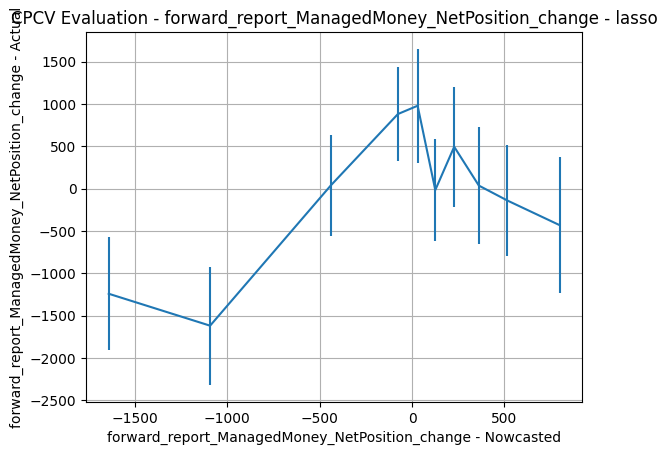

ridge: score=0.0820, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


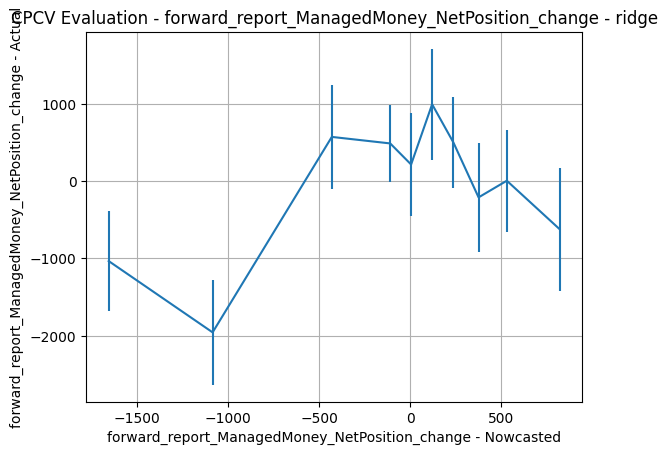

rf: score=0.1330, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}
{'n_estimators': 1000, 'max_depth': 11, 'min_samples_leaf': 6, 'max_features': 'sqrt'}


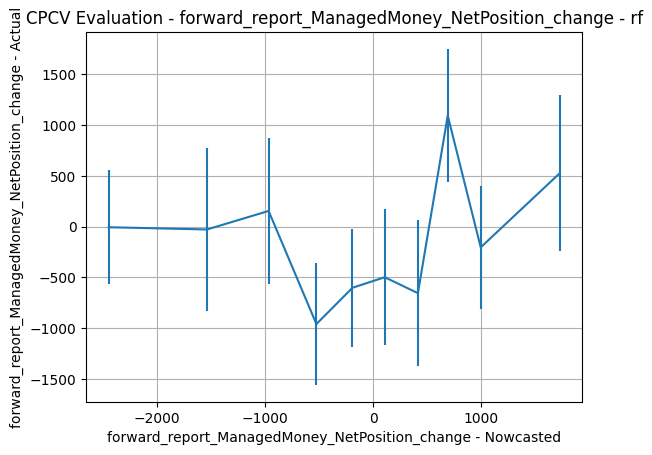

hgbm: score=0.1247, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


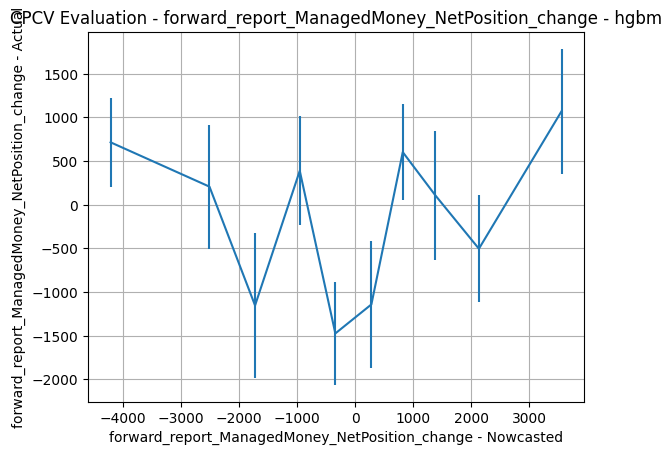

ols: score=0.0820, params={'model': 'ols'}
{}


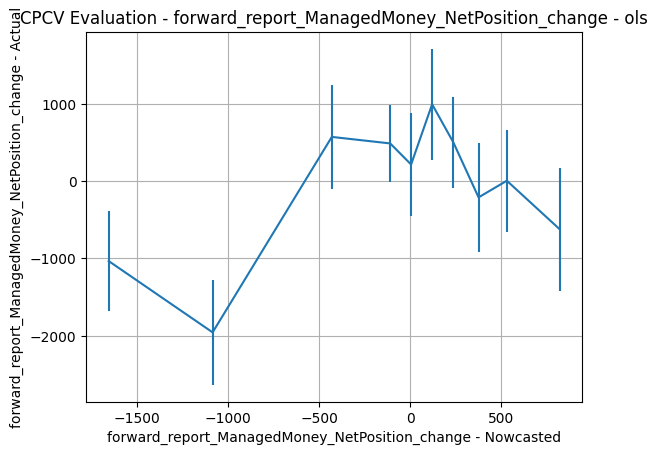

enet: score=-0.0460, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


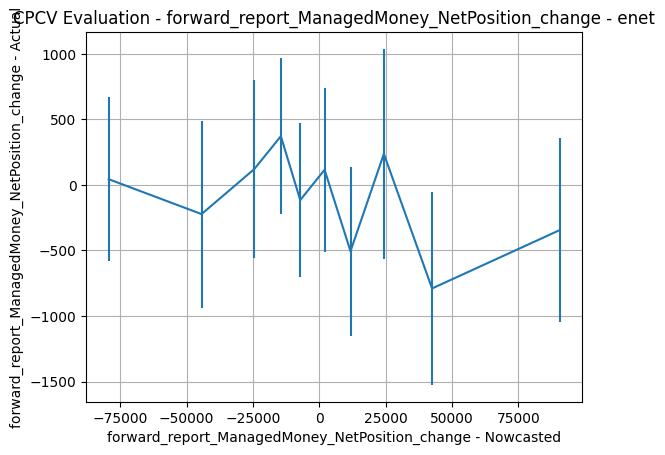

extra: score=0.1147, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


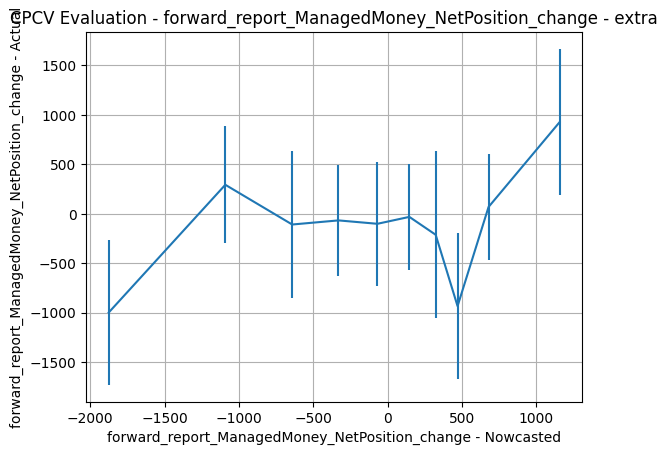

forward_report_ManagedMoney_LongPosition_change
lasso: score=0.1781, params={'model': 'lasso', 'alpha': 9.714586134002047}
{'alpha': 9.714586134002047}


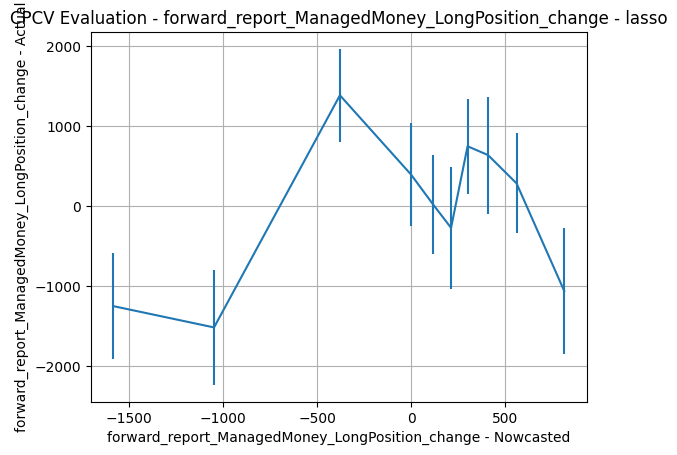

ridge: score=0.1782, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


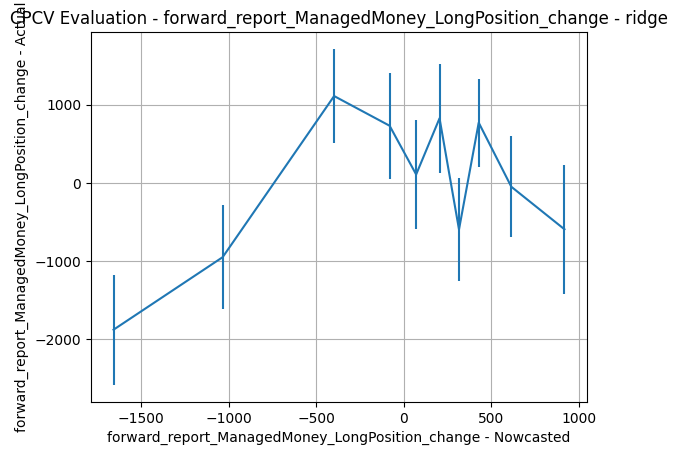

rf: score=0.1534, params={'model': 'rf', 'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 1000, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'log2'}


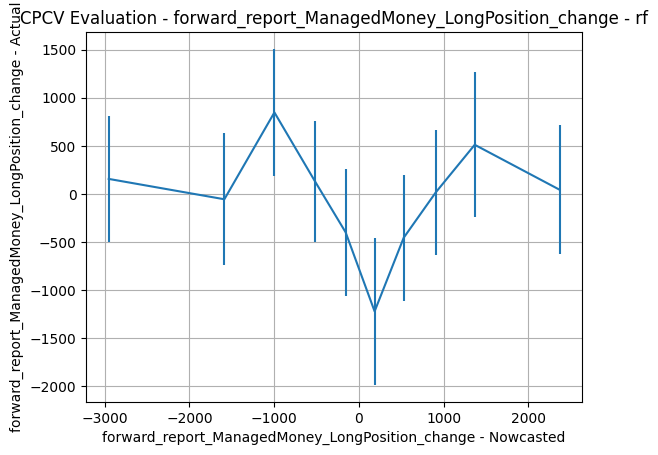

hgbm: score=0.0747, params={'model': 'hgbm', 'learning_rate': 0.25053236081220304, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}
{'learning_rate': 0.25053236081220304, 'max_depth': 8, 'max_iter': 500, 'l2_regularization': 0.9997880756517733, 'max_leaf_nodes': 183}


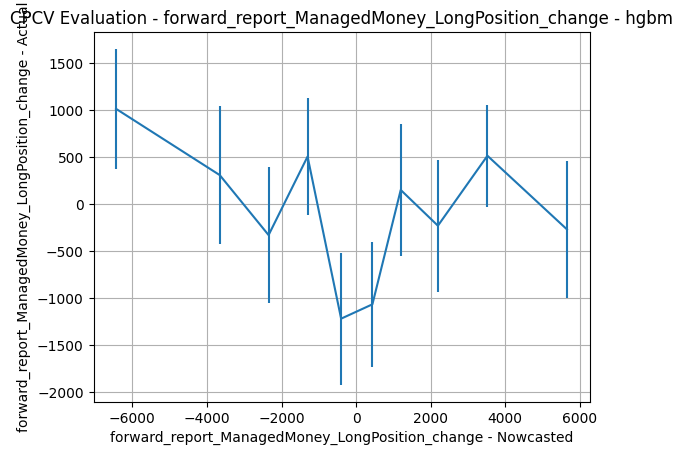

ols: score=0.1782, params={'model': 'ols'}
{}


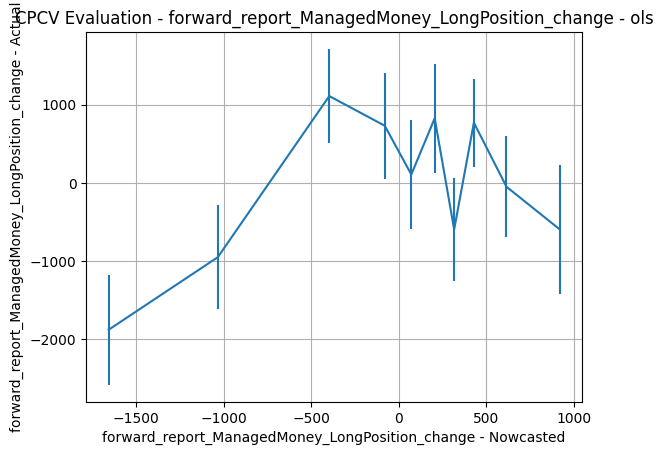

enet: score=-0.0029, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


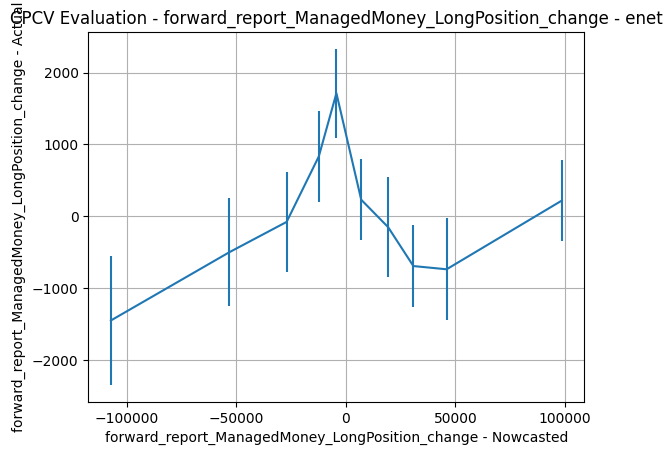

extra: score=0.1818, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


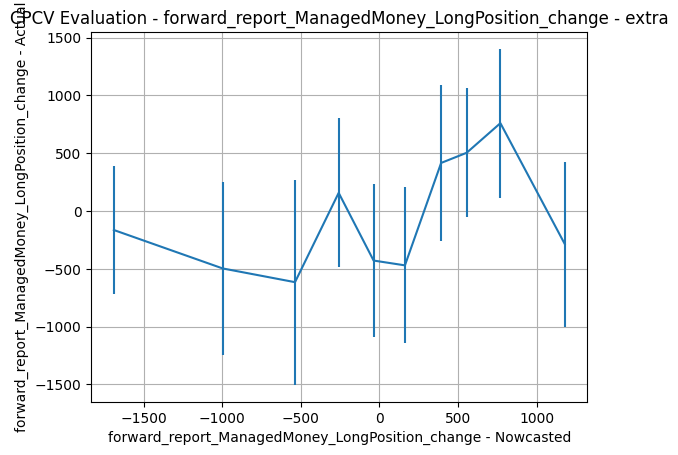

forward_report_ManagedMoney_ShortPosition_change
lasso: score=0.1092, params={'model': 'lasso', 'alpha': 6.303333510926016}
{'alpha': 6.303333510926016}


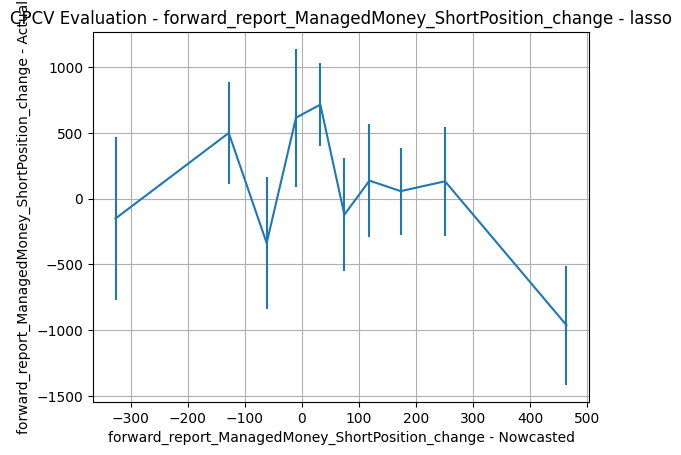

ridge: score=0.0626, params={'model': 'ridge', 'alpha': 711.837848136969}
{'alpha': 711.837848136969}


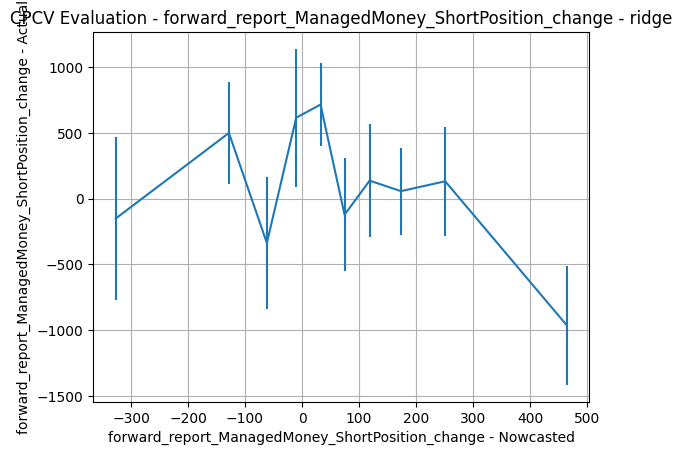

rf: score=0.0596, params={'model': 'rf', 'n_estimators': 600, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 25, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


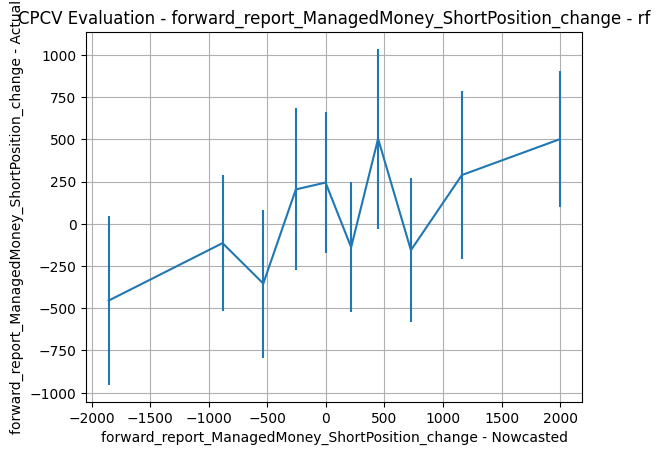

hgbm: score=0.0451, params={'model': 'hgbm', 'learning_rate': 0.24287207620269588, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.6167237611782374, 'max_leaf_nodes': 243}
{'learning_rate': 0.24287207620269588, 'max_depth': 3, 'max_iter': 500, 'l2_regularization': 0.6167237611782374, 'max_leaf_nodes': 243}


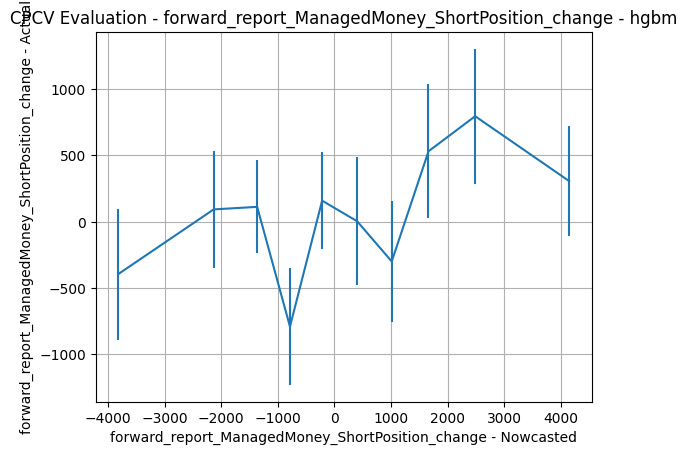

ols: score=0.1177, params={'model': 'ols'}
{}


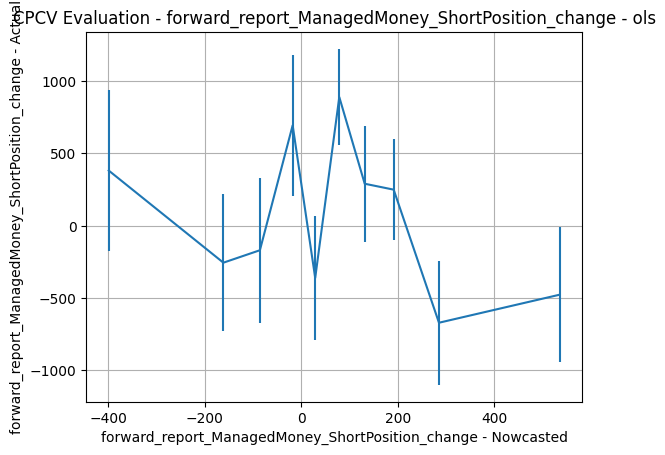

enet: score=-0.0391, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


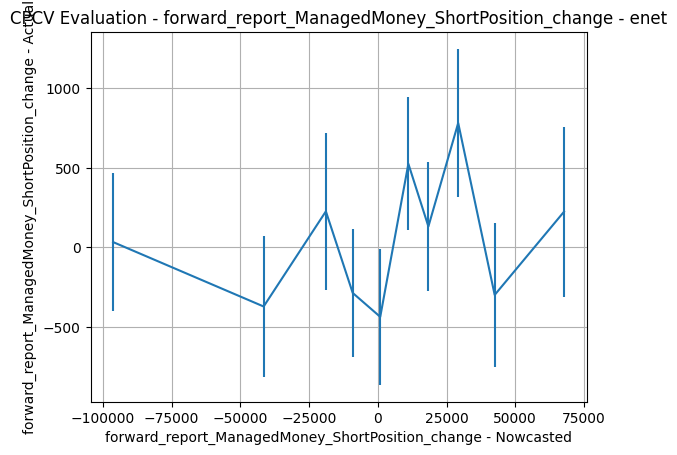

extra: score=0.0510, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


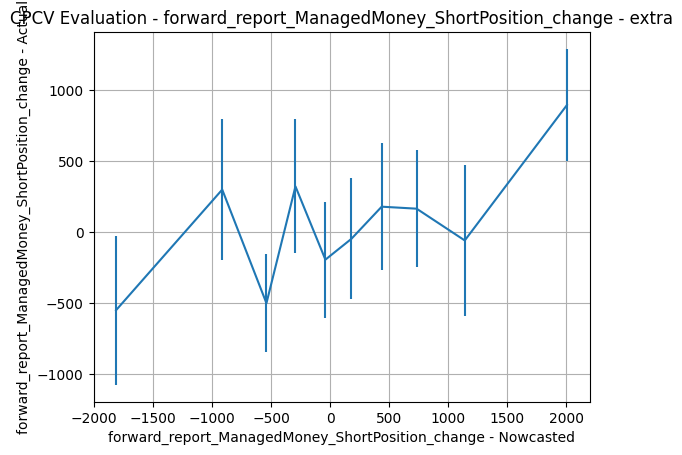

forward_ManagedMoney_NetPosition_to_openinterest_change
lasso: score=-0.0434, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


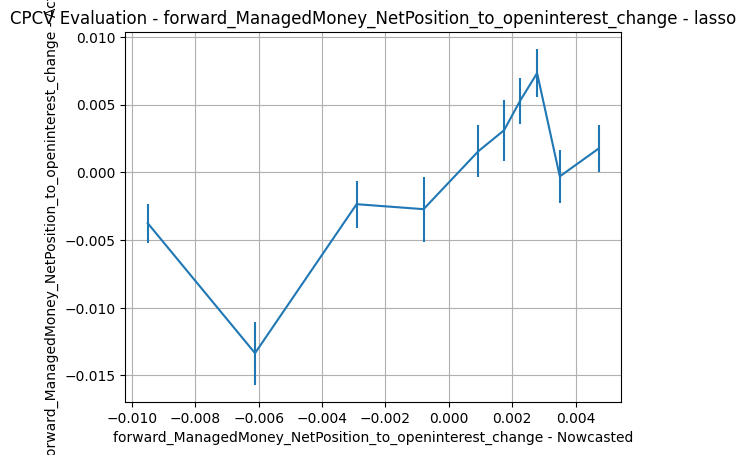

ridge: score=0.2301, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


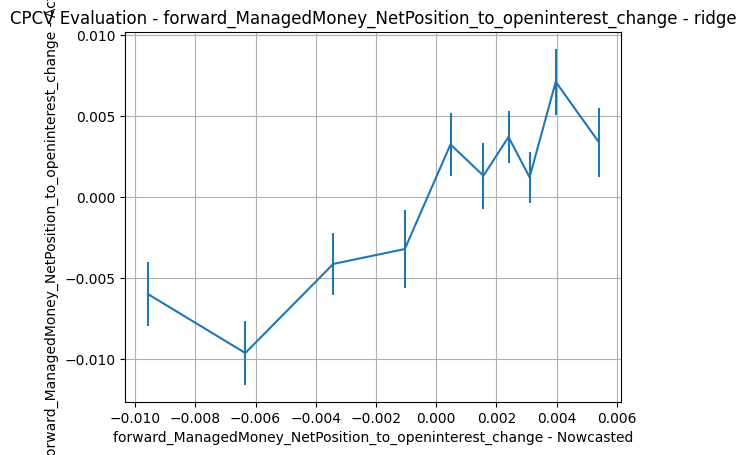

rf: score=0.2242, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}
{'n_estimators': 200, 'max_depth': 10, 'min_samples_leaf': 1, 'max_features': 'log2'}


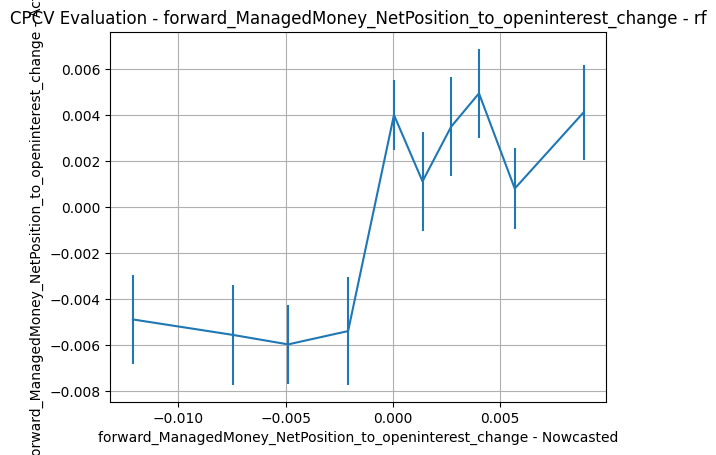

hgbm: score=0.1883, params={'model': 'hgbm', 'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}
{'learning_rate': 0.10057690178153984, 'max_depth': 7, 'max_iter': 100, 'l2_regularization': 0.6842330265121569, 'max_leaf_nodes': 121}


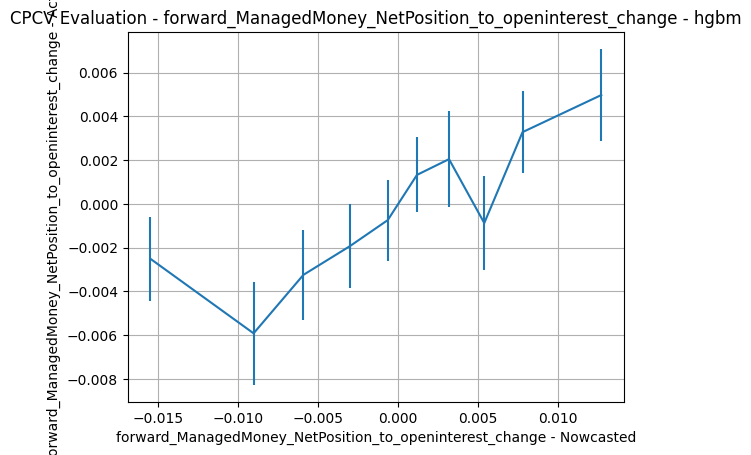

ols: score=0.2301, params={'model': 'ols'}
{}


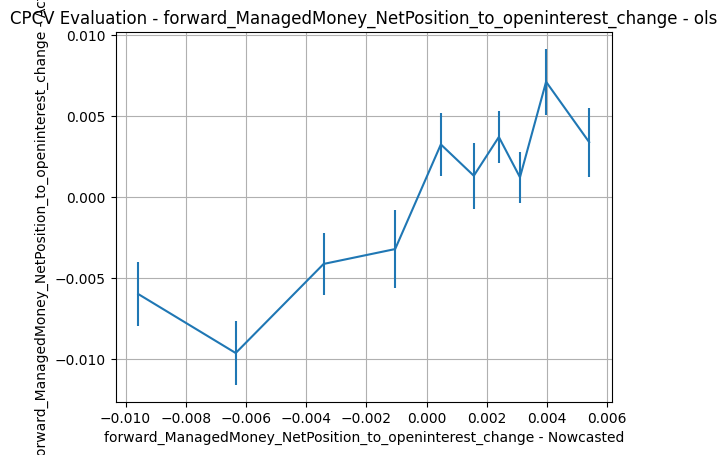

enet: score=-0.0344, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


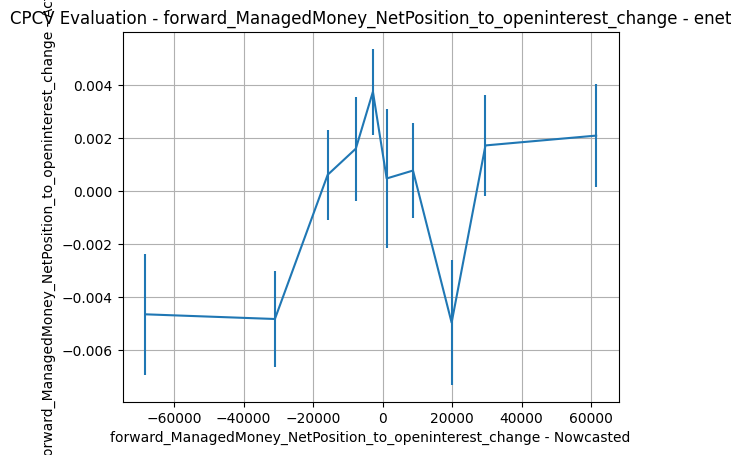

extra: score=0.2391, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}


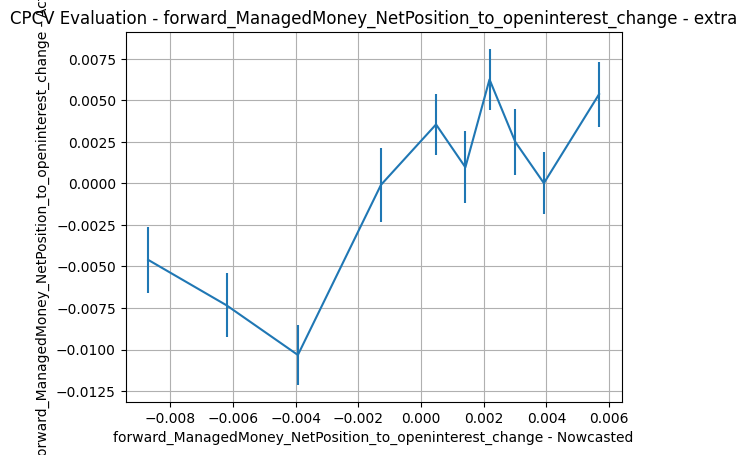

forward_ManagedMoney_LongPosition_to_openinterest_change
lasso: score=-0.0283, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


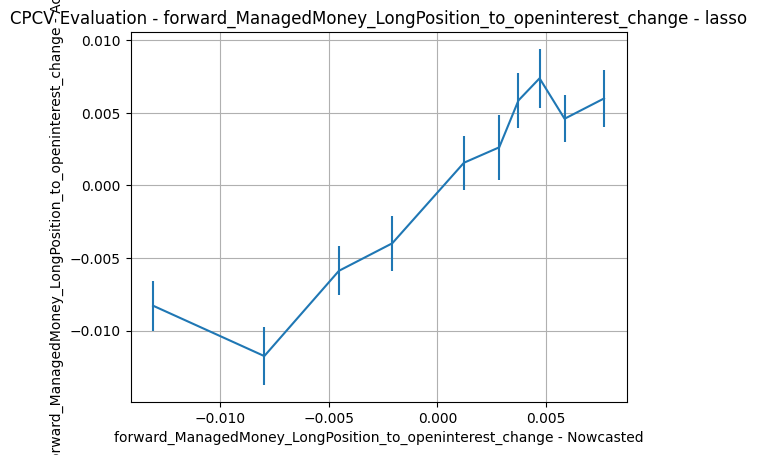

ridge: score=0.3408, params={'model': 'ridge', 'alpha': 906.6118860721004}
{'alpha': 906.6118860721004}


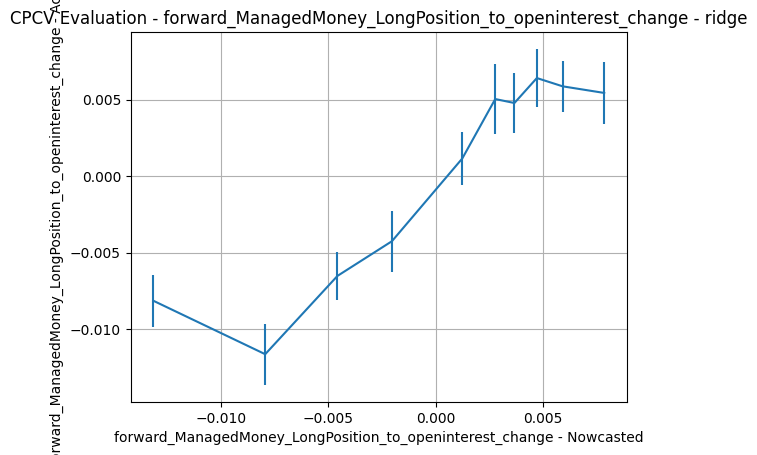

rf: score=0.3683, params={'model': 'rf', 'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}
{'n_estimators': 400, 'max_depth': 25, 'min_samples_leaf': 5, 'max_features': 'sqrt'}


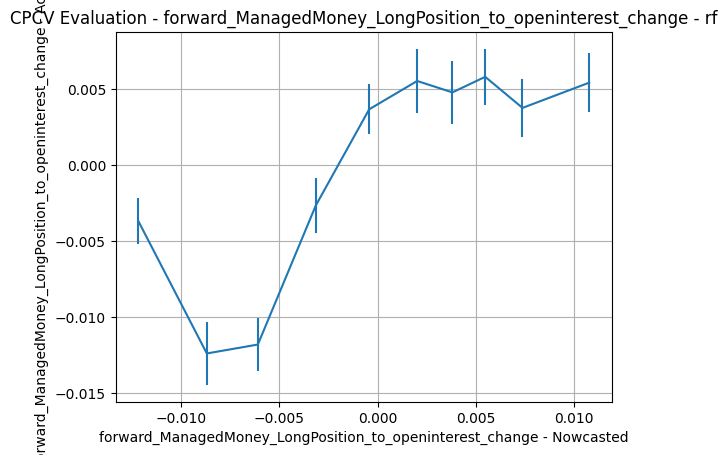

hgbm: score=0.2422, params={'model': 'hgbm', 'learning_rate': 0.20317617225236814, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}
{'learning_rate': 0.20317617225236814, 'max_depth': 5, 'max_iter': 500, 'l2_regularization': 0.503080564946794, 'max_leaf_nodes': 251}


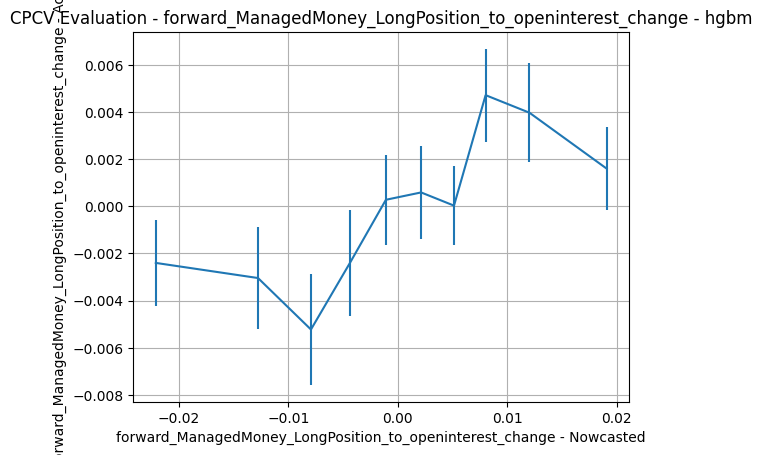

ols: score=0.3693, params={'model': 'ols'}
{}


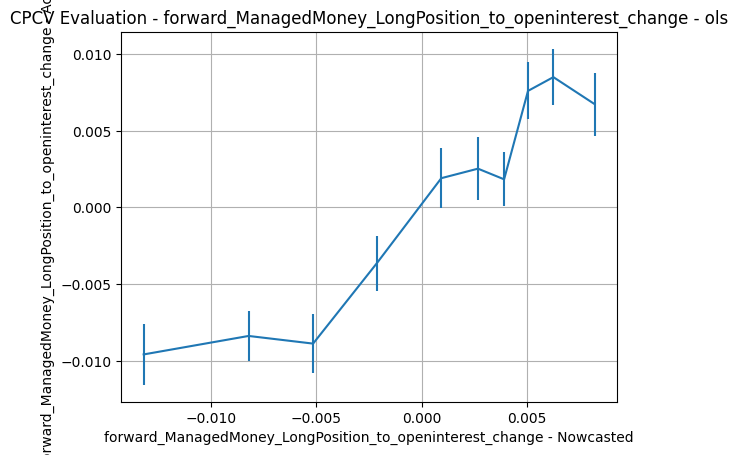

enet: score=0.1010, params={'model': 'enet', 'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}
{'alpha': 0.013921548533046502, 'l1_ratio': 0.3567533266935893, 'loss': 'huber', 'epsilon': 0.029043920769977766}


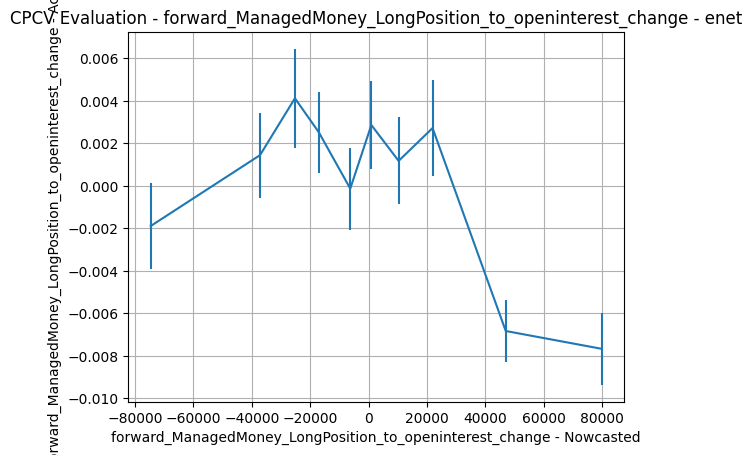

extra: score=0.3497, params={'model': 'extra', 'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 600, 'max_depth': 28, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


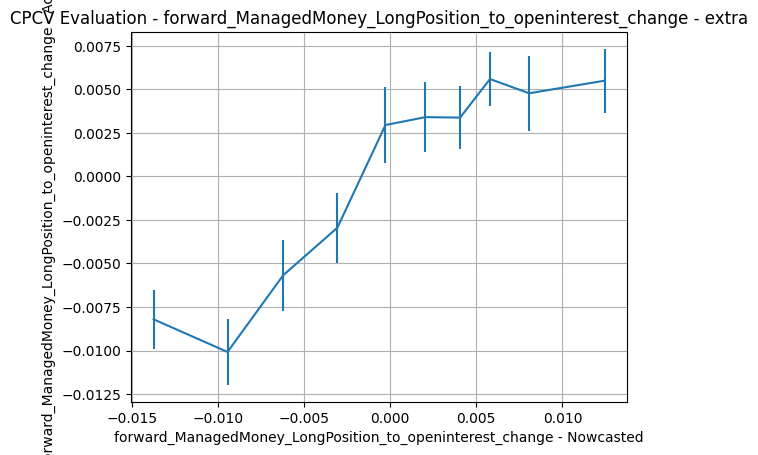

forward_ManagedMoney_ShortPosition_to_openinterest_change
lasso: score=-0.0691, params={'model': 'lasso', 'alpha': 1.156732719914599}
{'alpha': 1.156732719914599}


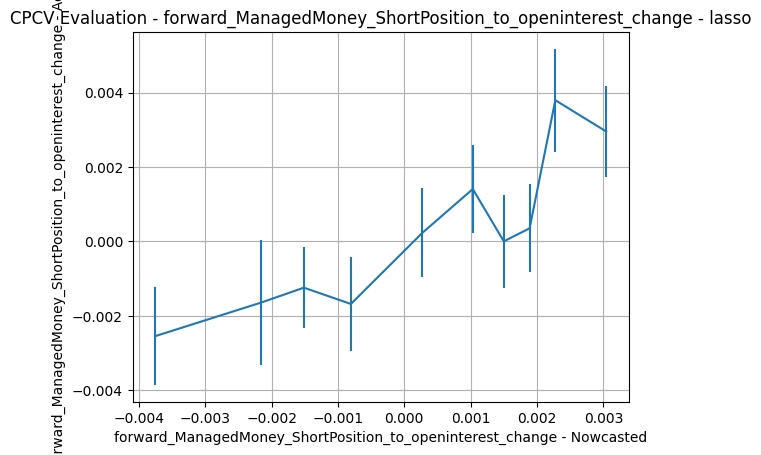

ridge: score=0.1562, params={'model': 'ridge', 'alpha': 4.473429410462694e-05}
{'alpha': 4.473429410462694e-05}


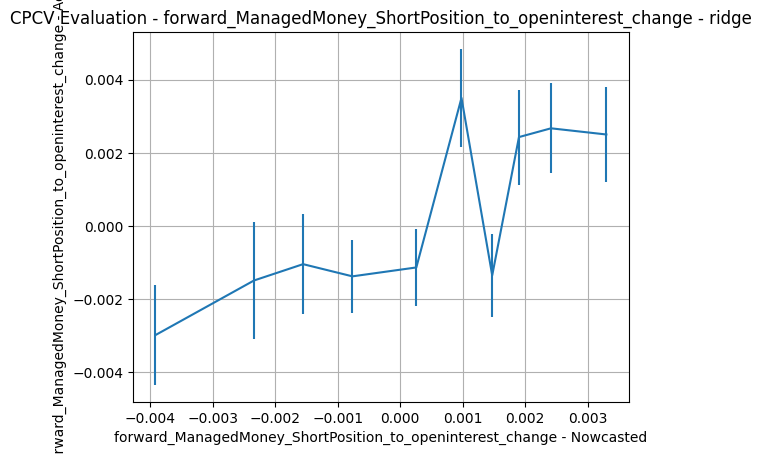

rf: score=0.1299, params={'model': 'rf', 'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}
{'n_estimators': 200, 'max_depth': 17, 'min_samples_leaf': 4, 'max_features': 'sqrt'}


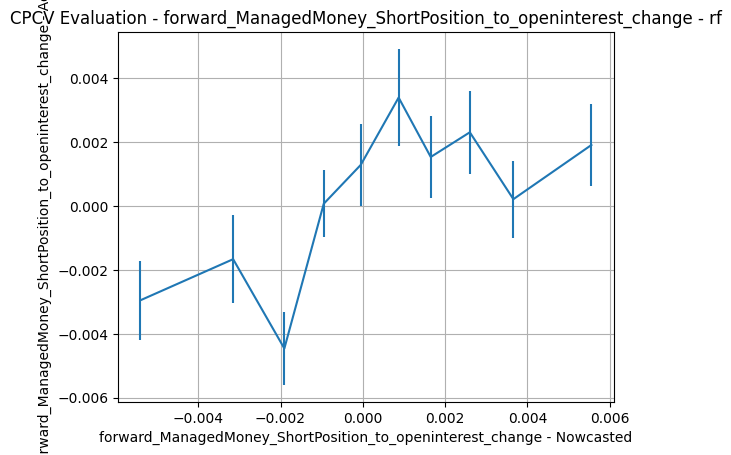

hgbm: score=0.0519, params={'model': 'hgbm', 'learning_rate': 0.21274218834412215, 'max_depth': 12, 'max_iter': 500, 'l2_regularization': 0.4708685053925604, 'max_leaf_nodes': 254}
{'learning_rate': 0.21274218834412215, 'max_depth': 12, 'max_iter': 500, 'l2_regularization': 0.4708685053925604, 'max_leaf_nodes': 254}


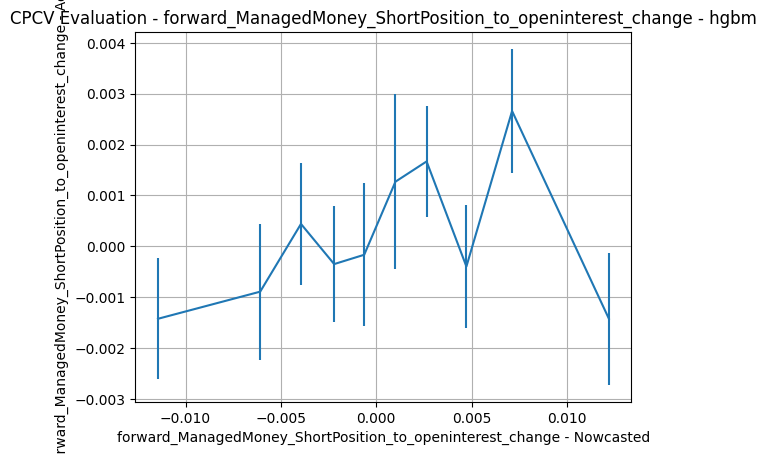

ols: score=0.1562, params={'model': 'ols'}
{}


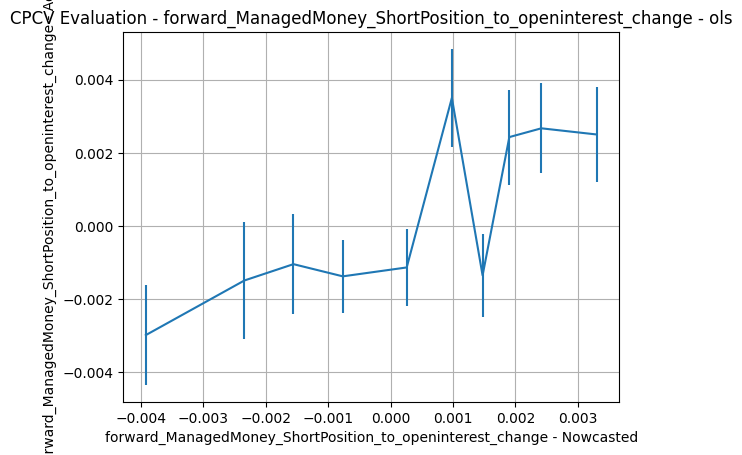

enet: score=-0.0706, params={'model': 'enet', 'alpha': 0.06377562217253858, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}
{'alpha': 0.06377562217253858, 'l1_ratio': 0.9088868831774647, 'loss': 'squared_error'}


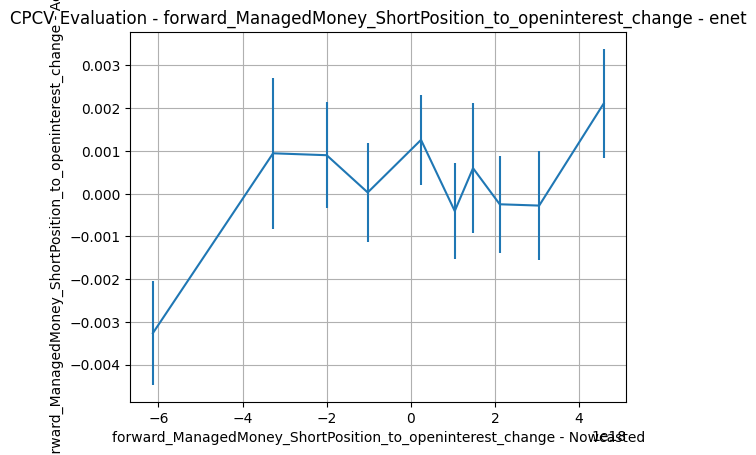

extra: score=0.1178, params={'model': 'extra', 'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
{'n_estimators': 1200, 'max_depth': 29, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


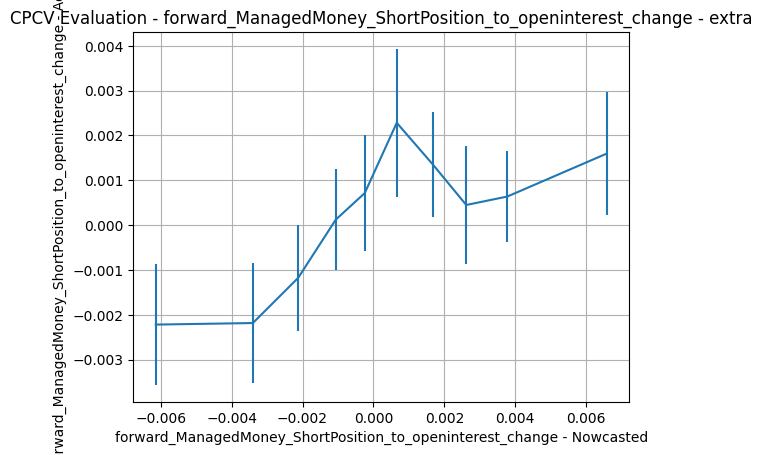

In [36]:
response_performance_map = {}
for response_name , best_model in responses_best_model.items():
    print(response_name)
    best_per_model = responses_best_per_model[response_name]
    response_performance_trail = {}
    for model_name, info in best_per_model.items():
        print(f"{model_name}: score={info['score']:.4f}, params={info['params']}")
        params = copy.deepcopy(info['params'])
        del params['model']
        print(params)
        # estimator = estimators_[model_name.lower()](**params) 

        if model_name == "enet": 
            estimator = SGDRegressor(**params)
        elif model_name == "lasso": 
            estimator = Lasso(**params)
        elif model_name == "ols": 
            estimator = LinearRegression()
        elif model_name == "ridge": 
            estimator = Ridge(**params)
        elif  model_name == "rf": 
            estimator = RandomForestRegressor(**params)
        elif model_name == "extra":
            estimator = ExtraTreesRegressor(**params)
        elif model_name == "hgbm":
            estimator = HistGradientBoostingRegressor(**params)
        

        Xy = dataset[['tradeDate']+feature_names+[response_name]].dropna()
        Xy.reset_index(drop=True, inplace= True)
        yhat = cpcv_predict( estimator ,
                             Xy[feature_names],
                             Xy[response_name],
                             cv=cv,
                                method = 'predict',
                                n_jobs=10)
        response_performance_trail[model_name] = np.corrcoef(yhat,  Xy[response_name])[0,1]
        _=plot_bin_summary_of_xy(
                    x = yhat,
                    y = Xy[response_name],
                    k= 10 )
        plt.xlabel(f'{response_name} - Nowcasted')
        plt.ylabel(f'{response_name} - Actual')
        plt.grid()
        plt.title(f'CPCV Evaluation - {response_name} - {model_name}')
        plt.show()
        plt.close()
    response_performance_map[response_name] = response_performance_trail
        
        

In [37]:
pd.DataFrame(response_performance_map).T

,lasso,ridge,rf,hgbm,ols,enet,extra
forward_report_ManagedMoney_NetPosition_change,0.075887,0.068464,0.019359,0.014876,0.068458,-0.014084,0.039249
forward_report_ManagedMoney_LongPosition_change,0.069546,0.057400,-0.031072,-0.036848,0.057389,0.063464,0.026427
forward_report_ManagedMoney_ShortPosition_change,-0.061697,-0.061697,0.063357,0.077364,-0.062782,0.034841,0.086419
forward_ManagedMoney_NetPosition_to_openinterest_change,0.219903,0.228218,0.181650,0.140672,0.228219,0.067707,0.229627
forward_ManagedMoney_LongPosition_to_openinterest_change,0.339771,0.338212,0.290273,0.116211,0.347632,-0.122430,0.270792
forward_ManagedMoney_ShortPosition_to_openinterest_change,0.158364,0.156183,0.130848,0.051940,0.156178,0.085735,0.117297


In [38]:
final_selected_model_per_response = dict(pd.DataFrame(response_performance_map).T.idxmax(axis=1))

In [39]:
final_selected_model_and_parameters_per_response = {}
for response_name , best_model_params in responses_best_per_model.items():
    print(response_name)
    best_model_name = final_selected_model_per_response[response_name]
    best_model_params = copy.deepcopy(best_model_params[best_model_name]['params'])
    del best_model_params['model']
    print(best_model_params)
    final_selected_model_and_parameters_per_response[response_name] = {
'model_name' : best_model_name, 
    'params': best_model_params
        
    }
    

forward_report_ManagedMoney_NetPosition_change
{'alpha': 9.714586134002047}
forward_report_ManagedMoney_LongPosition_change
{'alpha': 9.714586134002047}
forward_report_ManagedMoney_ShortPosition_change
{'n_estimators': 1200, 'max_depth': 30, 'min_samples_leaf': 1, 'max_features': 'sqrt'}
forward_ManagedMoney_NetPosition_to_openinterest_change
{'n_estimators': 1200, 'max_depth': 21, 'min_samples_leaf': 3, 'max_features': 'sqrt'}
forward_ManagedMoney_LongPosition_to_openinterest_change
{}
forward_ManagedMoney_ShortPosition_to_openinterest_change
{'alpha': 1.156732719914599}


In [40]:
final_selected_model_and_parameters_per_response

{'forward_report_ManagedMoney_NetPosition_change': {'model_name': 'lasso',
  'params': {'alpha': 9.714586134002047}},
 'forward_report_ManagedMoney_LongPosition_change': {'model_name': 'lasso',
  'params': {'alpha': 9.714586134002047}},
 'forward_report_ManagedMoney_ShortPosition_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 30,
   'min_samples_leaf': 1,
   'max_features': 'sqrt'}},
 'forward_ManagedMoney_NetPosition_to_openinterest_change': {'model_name': 'extra',
  'params': {'n_estimators': 1200,
   'max_depth': 21,
   'min_samples_leaf': 3,
   'max_features': 'sqrt'}},
 'forward_ManagedMoney_LongPosition_to_openinterest_change': {'model_name': 'ols',
  'params': {}},
 'forward_ManagedMoney_ShortPosition_to_openinterest_change': {'model_name': 'lasso',
  'params': {'alpha': 1.156732719914599}}}

In [41]:
import json
with open("rbob_cot_mm_forecast_selected_model_by_response.json", "w") as f:
    json.dump(final_selected_model_and_parameters_per_response, f)